In [90]:
import math
import numpy as np

In [91]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [92]:
import initdatuneq

In [93]:
delta=0.005 #with dtmin=0.001, accuracy of 1e-6 appears to be too much to ask. try 0.05
rad0=25
ecc0=3.0 #set ecc = 0 for circle, ecc < 1 for ellepse, = 1 for parabola, >1 for hyperbola
theta0= 0.0 #math.pi/6. #math.pi/6.
mass0_1=20.0
mass0_2=3.0
initdatequneq=initdatuneq.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0_1,mass0_2)
print(initdatequneq)

angle 0.0
3.0
(array([3.14159265, 0.        ]), 0.0, 25, 3.0, array([20.,  3.]))


In [94]:
import getxyuvtwouneq_apper #unequal mass version

In [95]:
useperihelion=True

In [96]:
xyuvaequneq=getxyuvtwouneq_apper.getxyuvequneq(initdatequneq,useperihelion)
print(xyuvaequneq)
masses,xvec,avec=xyuvaequneq

initdat 25 [3.14159265 0.        ] 3.0 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 25
pi
zero
[-25.  25.]
[0. 0.]
hyperbola
(array([20.,  3.]), array([[-6.52173913,  0.        ,  0.        , -0.        , -0.17693035,
         0.        ],
       [43.47826087,  0.        ,  0.        , -0.        ,  1.17953565,
         0.        ]]), array([[ 0.0012, -0.    ,  0.    ],
       [-0.008 , -0.    ,  0.    ]]))


In [97]:
import RK4implicit

In [98]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [99]:
import OrbitDiffEqAdaptive

In [100]:
masses, xvec,avec=xyuvaequneq
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

[20.  3.] [[-6.52173913  0.          0.         -0.         -0.17693035  0.        ]
 [43.47826087  0.          0.         -0.          1.17953565  0.        ]] 0.0
[20.  3.] [[-6.52173913  0.          0.         -0.         -0.17693035  0.        ]
 [43.47826087  0.          0.         -0.          1.17953565  0.        ]] 0.0


In [101]:
print(xyuvaequneq)

(array([20.,  3.]), array([[-6.52173913,  0.        ,  0.        , -0.        , -0.17693035,
         0.        ],
       [43.47826087,  0.        ,  0.        , -0.        ,  1.17953565,
         0.        ]]), array([[ 0.0012, -0.    ,  0.    ],
       [-0.008 , -0.    ,  0.    ]]))


In [102]:
import timestepAdaptive

In [103]:
import parabfns

In [104]:
import ellipsefns

In [105]:
import hyperbfns

In [106]:
numsteps=10000 #50000

#numsteps=6000*10

dt=.01
dtmax=1
dtmin = 0.001
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a,nperr,npdt= timestepAdaptive.timestepAdaptive(numsteps,dt,dtmax,dtmin,xyuvaequneq,outputevery,delta)

0.01
[-1.79999986e-07  1.76930344e-03  0.00000000e+00]
[3.23999951e-14 3.13043465e-06 0.00000000e+00]
3.130434680608704e-06
0.0017693034450338653
84.779126170259 False
0.027309562539954372
[-1.6701753e-06  4.8318892e-03  0.0000000e+00]
[2.78948552e-12 2.33471533e-05 0.00000000e+00]
2.3347156077982487e-05
0.004831889493560722
31.043756319323816 False
0.0580164056885042
[-8.65606278e-06  1.02648479e-02  0.00000000e+00]
[7.49274229e-11 1.05367103e-04 0.00000000e+00]
0.00010536717833939166
0.01026485159850797
14.612973072285135 False
0.10208877080311665
[-3.04372634e-05  1.80624977e-02  0.00000000e+00]
[9.26427003e-10 3.26253822e-04 0.00000000e+00]
0.00032625474808563223
0.01806252330339347
8.304487555834402 False
0.1559727372318006
[-8.07343136e-05  2.75958330e-02  0.00000000e+00]
[6.51802939e-09 7.61530001e-04 0.00000000e+00]
0.0007615365188574639
0.027595951131596533
5.435579998119888 False
0.21433972848839367
[-0.00017356  0.0379216   0.        ]
[3.01244107e-08 1.43804778e-03 0.000000

[0.00065244 0.00894284 0.        ]
0.009595280242956073
0.097955501340946
1.531307562583002 False
0.6300269009527993
[-0.02562906  0.09454662  0.        ]
[0.00065685 0.00893906 0.        ]
0.009595912459315526
0.09795872834676615
1.5312571174771874 False
0.6307592570067528
[-0.02571379  0.09452696  0.        ]
[0.0006612  0.00893535 0.        ]
0.00959654459310216
0.09796195482483064
1.5312066839439913 False
0.6314872645880409
[-0.02579719  0.09450757  0.        ]
[0.0006655  0.00893168 0.        ]
0.009597176383705991
0.09796517944507625
1.5311562827698064 False
0.6322109098506272
[-0.02587928  0.09448847  0.        ]
[0.00066974 0.00892807 0.        ]
0.009597807583177098
0.09796840094222779
1.531105933723011 False
0.6329301810945146
[-0.02596009  0.09446963  0.        ]
[0.00067393 0.00892451 0.        ]
0.009598437955773148
0.09797161811347789
1.5310556555905714 False
0.6336450686764499
[-0.02603964  0.09445107  0.        ]
[0.00067806 0.008921   0.        ]
0.009599067277522539
0

0.6910091497559525
[-0.03051932  0.09336801  0.        ]
[0.00093143 0.00871759 0.        ]
0.009649014602010546
0.09822939785018814
1.5270377634684107 False
0.6913353301372385
[-0.03053633  0.09336376  0.        ]
[0.00093247 0.00871679 0.        ]
0.009649259570946084
0.09823064476499217
1.5270183796396863 False
0.6916594695322907
[-0.03055317  0.09335955  0.        ]
[0.0009335  0.00871601 0.        ]
0.009649502311220694
0.09823188032009106
1.5269991728878773 False
0.6919815849597707
[-0.03056982  0.09335539  0.        ]
[0.00093451 0.00871523 0.        ]
0.009649742846016078
0.09823310463390678
1.5269801413588329 False
0.6923016932840591
[-0.03058629  0.09335127  0.        ]
[0.00093552 0.00871446 0.        ]
0.009649981198298952
0.09823431782375726
1.52696128321587 False
0.6926198112162006
[-0.03060259  0.09334719  0.        ]
[0.00093652 0.0087137  0.        ]
0.00965021739081655
0.09823552000583369
1.5269425966401184 False
0.692935955314905
[-0.03061872  0.09334316  0.        ]

0.7194615635246986
[-0.03173235  0.09306217  0.        ]
[0.00100694 0.00866057 0.        ]
0.009667510463250664
0.09832349903889032
1.5255763013546726 False
0.719628889911193
[-0.03173797  0.09306074  0.        ]
[0.0010073 0.0086603 0.       ]
0.009667600949021353
0.09832395918097152
1.5255691618755447 False
0.7197954130756801
[-0.03174355  0.09305932  0.        ]
[0.00100765 0.00866004 0.        ]
0.009667690778474783
0.09832441598339033
1.5255620742800962 False
0.7199611385600413
[-0.03174908  0.09305792  0.        ]
[0.001008   0.00865978 0.        ]
0.009667779957675808
0.09832486947703419
1.5255550380876488 False
0.720126071857813
[-0.03175458  0.09305652  0.        ]
[0.00100835 0.00865952 0.        ]
0.009667868492629413
0.09832531969248517
1.5255480528222907 False
0.7202902184146176
[-0.03176002  0.09305513  0.        ]
[0.0010087  0.00865926 0.        ]
0.009667956389267726
0.09832576665995402
1.525541118013899 False
0.7204535836287191
[-0.03176543  0.09305375  0.        ]
[

1.5249884803104294 False
0.7351419196873195
[-0.03218932  0.09294543  0.        ]
[0.00103615 0.00863885 0.        ]
0.009675006253461179
0.09836160965265452
1.5249852104870663 False
0.7352416575218401
[-0.03219179  0.0929448   0.        ]
[0.00103631 0.00863874 0.        ]
0.00967504750332373
0.09836181933719877
1.524981959572931 False
0.7353410169933765
[-0.03219425  0.09294417  0.        ]
[0.00103647 0.00863862 0.        ]
0.00967508851532636
0.09836202781219162
1.5249787274252191 False
0.7354400002066341
[-0.03219669  0.09294355  0.        ]
[0.00103663 0.0086385  0.        ]
0.009675129291253212
0.09836223508671003
1.5249755139029662 False
0.7355386092511321
[-0.03219911  0.09294292  0.        ]
[0.00103678 0.00863839 0.        ]
0.00967516983287837
0.09836244116977969
1.5249723188660058 False
0.735636846201277
[-0.03220152  0.0929423   0.        ]
[0.00103694 0.00863827 0.        ]
0.00967521014195423
0.09836264607031589
1.5249691421758869 False
0.7357347131165466
[-0.03220392  

1.5247031799368944 False
0.7447637300517289
[-0.03240324  0.09289046  0.        ]
[0.00104997 0.00862864 0.        ]
0.00967860814070044
0.09837991736477744
1.5247014229928992 False
0.7448301175362274
[-0.03240455  0.09289013  0.        ]
[0.00105005 0.00862858 0.        ]
0.009678630340086489
0.09838003018949776
1.5246996744265358 False
0.7448962973717819
[-0.03240585  0.09288979  0.        ]
[0.00105014 0.00862851 0.        ]
0.009678652433854792
0.0983801424773048
1.5246979341852784 False
0.744962270518652
[-0.03240714  0.09288946  0.        ]
[0.00105022 0.00862845 0.        ]
0.009678674422666145
0.09838025423155881
1.5246962022169932 False
0.7450280379312652
[-0.03240843  0.09288913  0.        ]
[0.00105031 0.00862839 0.        ]
0.009678696307177045
0.09838036545559813
1.5246944784698861 False
0.7450936005582515
[-0.03240971  0.0928888   0.        ]
[0.00105039 0.00862833 0.        ]
0.009678718088036817
0.09838047615272462
1.5246927628927296 False
0.7451589593425085
[-0.0324109

0.7513821508084488
[-0.03252263  0.09285968  0.        ]
[0.00105772 0.00862292 0.        ]
0.009680642613775874
0.09839025670144312
1.5245411997974785 False
0.7514293859729666
[-0.0325234   0.09285949  0.        ]
[0.00105777 0.00862288 0.        ]
0.009680655838091991
0.0983903239048027
1.5245401584929439 False
0.7514764957869406
[-0.03252417  0.09285929  0.        ]
[0.00105782 0.00862285 0.        ]
0.009680669009057315
0.09839039083699848
1.5245391213914599 False
0.7515234807443105
[-0.03252494  0.09285909  0.        ]
[0.00105787 0.00862281 0.        ]
0.009680682126958827
0.09839045749948938
1.5245380884704032 False
0.75157034133642
[-0.0325257   0.09285889  0.        ]
[0.00105792 0.00862277 0.        ]
0.009680695192070767
0.09839052389366959
1.524537059708155 False
0.75161707805214
[-0.03252646  0.0928587   0.        ]
[0.00105797 0.00862274 0.        ]
0.00968070820468116
0.09839059002100334
1.5245360350820099 False
0.7516636913777324
[-0.03252722  0.0928585   0.        ]
[0

1.5244409884854049 False
0.7563108518076819
[-0.03259734  0.09284039  0.        ]
[0.00106259 0.00861934 0.        ]
0.009681923821801731
0.09839676733410367
1.524440325266773 False
0.7563458849834737
[-0.03259783  0.09284026  0.        ]
[0.00106262 0.00861931 0.        ]
0.009681932216789682
0.09839680999295497
1.5244396643624902 False
0.7563808378018781
[-0.03259831  0.09284013  0.        ]
[0.00106265 0.00861929 0.        ]
0.009681940582533024
0.09839685250318235
1.5244390057613753 False
0.7564157105372731
[-0.0325988   0.09284001  0.        ]
[0.00106268 0.00861927 0.        ]
0.00968194891915821
0.0983968948654286
1.524438349453464 False
0.7564505034628787
[-0.03259928  0.09283988  0.        ]
[0.00106271 0.00861924 0.        ]
0.009681957226809616
0.09839693708042754
1.5244376954273813 False
0.7564852168505822
[-0.03259976  0.09283976  0.        ]
[0.00106274 0.00861922 0.        ]
0.009681965505612357
0.09839697914881511
1.524437043673269 False
0.7565198509711253
[-0.03260024 

0.09840098981082702
1.524374910134243 False
0.7600361878618263
[-0.03264594  0.09282781  0.        ]
[0.00106576 0.008617   0.        ]
0.009682760463675312
0.09840101861096415
1.5243744639782268 False
0.7600631840139622
[-0.03264627  0.09282773  0.        ]
[0.00106578 0.00861699 0.        ]
0.009682766114220798
0.09840104732278411
1.524374019190632 False
0.7600901256795055
[-0.03264659  0.09282765  0.        ]
[0.0010658  0.00861697 0.        ]
0.00968277174745812
0.09840107594664867
1.5243735757658519 False
0.7601170130224673
[-0.03264692  0.09282756  0.        ]
[0.00106582 0.00861696 0.        ]
0.009682777363459936
0.0984011044829271
1.5243731336981634 False
0.760143846206181
[-0.03264724  0.09282748  0.        ]
[0.00106584 0.00861694 0.        ]
0.009682782962292262
0.09840113293195492
1.5243726929823669 False
0.7601706253933673
[-0.03264757  0.09282739  0.        ]
[0.00106586 0.00861692 0.        ]
0.009682788544028122
0.09840116129410324
1.5243722536127107 False
0.7601973507

0.7629493990159908
[-0.0326793   0.09281918  0.        ]
[0.00106794 0.0086154  0.        ]
0.009683336129301605
0.09840394366742425
1.524329151959142 False
0.7629708287132854
[-0.03267953  0.09281912  0.        ]
[0.00106795 0.00861539 0.        ]
0.0096833401093441
0.09840396389040484
1.5243288386945373 False
0.7629922198118936
[-0.03267976  0.09281906  0.        ]
[0.00106797 0.00861538 0.        ]
0.00968334407851104
0.09840398405812155
1.5243285262861275 False
0.7630135724156708
[-0.03267999  0.092819    0.        ]
[0.00106798 0.00861537 0.        ]
0.009683348036851946
0.09840400417082602
1.524328214730013 False
0.7630348866280026
[-0.03268022  0.09281894  0.        ]
[0.001068   0.00861536 0.        ]
0.009683351984402237
0.09840402422869828
1.5243279040234048 False
0.7630561625519424
[-0.03268045  0.09281888  0.        ]
[0.00106801 0.00861534 0.        ]
0.009683355921194686
0.09840404423190485
1.5243275941637218 False
0.7630774002902392
[-0.03268067  0.09281882  0.        ]


0.09840602568648898
1.5242969010646144 False
0.7652892080893209
[-0.03270318  0.09281299  0.        ]
[0.0010695  0.00861425 0.        ]
0.009683748805340014
0.09840604049213653
1.5242966717270396 False
0.7653066266861742
[-0.03270335  0.09281294  0.        ]
[0.00106951 0.00861424 0.        ]
0.009683751712082224
0.09840605526126034
1.5242964429552814 False
0.7653240169638621
[-0.03270352  0.0928129   0.        ]
[0.00106952 0.00861423 0.        ]
0.009683754611669478
0.09840606999402769
1.5242962147467485 False
0.7653413789911296
[-0.03270369  0.09281286  0.        ]
[0.00106953 0.00861423 0.        ]
0.009683757504120273
0.0984060846905326
1.524295987099984 False
0.7653587128365489
[-0.03270385  0.09281281  0.        ]
[0.00106954 0.00861422 0.        ]
0.009683760389456977
0.09840609935088869
1.524295760013227 False
0.7653760185684806
[-0.03270402  0.09281277  0.        ]
[0.00106955 0.00861421 0.        ]
0.009683763267701512
0.09840611397520742
1.524295533484751 False
0.765393296

0.7672093497119247
[-0.03272086  0.0928084   0.        ]
[0.00107065 0.0086134  0.        ]
0.009684054557369273
0.09840759400254268
1.524272608434307 False
0.7672237840403989
[-0.03272098  0.09280837  0.        ]
[0.00107066 0.00861339 0.        ]
0.009684056743810928
0.09840760511165246
1.5242724363611047 False
0.7672381969873033
[-0.03272111  0.09280834  0.        ]
[0.00107067 0.00861339 0.        ]
0.009684058925349268
0.0984076161958477
1.5242722646738518 False
0.7672525885999877
[-0.03272124  0.09280831  0.        ]
[0.00107068 0.00861338 0.        ]
0.009684061101994556
0.09840762725518055
1.5242720933717404 False
0.7672669589257057
[-0.03272136  0.09280827  0.        ]
[0.00107069 0.00861338 0.        ]
0.00968406327376854
0.09840763828976154
1.524271922453058 False
0.7672813080115011
[-0.03272149  0.09280824  0.        ]
[0.0010707  0.00861337 0.        ]
0.00968406544068009
0.09840764929963569
1.5242717519171074 False
0.7672956359043347
[-0.03272161  0.09280821  0.        ]


0.7688253751475748
[-0.0327344   0.09280489  0.        ]
[0.00107154 0.00861275 0.        ]
0.009684288991838768
0.0984087851354683
1.5242541587472285 False
0.7688375133738364
[-0.0327345   0.09280487  0.        ]
[0.00107155 0.00861274 0.        ]
0.00968429067376226
0.09840879368106419
1.524254026384463 False
0.7688496351004471
[-0.0327346   0.09280484  0.        ]
[0.00107155 0.00861274 0.        ]
0.009684292352216217
0.09840880220903116
1.524253894294775 False
0.7688617403610553
[-0.03273469  0.09280482  0.        ]
[0.00107156 0.00861273 0.        ]
0.009684294027227182
0.09840881071950408
1.524253762476075 False
0.768873829189049
[-0.03273479  0.09280479  0.        ]
[0.00107157 0.00861273 0.        ]
0.009684295698799658
0.09840881921250584
1.5242536309280086 False
0.768885901617775
[-0.03273489  0.09280477  0.        ]
[0.00107157 0.00861272 0.        ]
0.009684297366942035
0.09840882768807906
1.5242534996499153 False
0.7688979576805
[-0.03273498  0.09280474  0.        ]
[0.00

0.7701832607576159
[-0.03274485  0.09280218  0.        ]
[0.00107223 0.00861224 0.        ]
0.009684469862411681
0.09840970410692068
1.524239924926786 False
0.770193622352358
[-0.03274492  0.09280216  0.        ]
[0.00107223 0.00861224 0.        ]
0.009684471186134514
0.09840971083249109
1.5242398207563455 False
0.7702039709270726
[-0.032745    0.09280214  0.        ]
[0.00107224 0.00861224 0.        ]
0.00968447250734553
0.098409717545299
1.5242397167835937 False
0.7702143065062043
[-0.03274508  0.09280212  0.        ]
[0.00107224 0.00861223 0.        ]
0.009684473826041082
0.09840972424532589
1.5242396130088176 False
0.7702246291142352
[-0.03274515  0.0928021   0.        ]
[0.00107224 0.00861223 0.        ]
0.009684475142236144
0.09840973093264783
1.524239509430839 False
0.7702349387755006
[-0.03274523  0.09280208  0.        ]
[0.00107225 0.00861223 0.        ]
0.009684476455932343
0.0984097376072731
1.5242394060495295 False
0.770245235514322
[-0.0327453   0.09280206  0.        ]
[0.

0.7713490539713703
[-0.03275314  0.09280003  0.        ]
[0.00107277 0.00861185 0.        ]
0.009684613444118126
0.09841043361411494
1.5242286258810427 False
0.771358001742494
[-0.0327532   0.09280001  0.        ]
[0.00107277 0.00861184 0.        ]
0.009684614504424935
0.09841043900128144
1.5242285424419943 False
0.7713669390609056
[-0.03275326  0.0928      0.        ]
[0.00107278 0.00861184 0.        ]
0.009684615562860195
0.09841044437893874
1.524228459150238 False
0.7713758659448738
[-0.03275332  0.09279998  0.        ]
[0.00107278 0.00861184 0.        ]
0.009684616619422931
0.0984104497470819
1.5242283760058506 False
0.7713847824126786
[-0.03275338  0.09279997  0.        ]
[0.00107278 0.00861183 0.        ]
0.009684617674125515
0.09841045510577377
1.524228293007858 False
0.7713936884824779
[-0.03275344  0.09279995  0.        ]
[0.00107279 0.00861183 0.        ]
0.009684618726967908
0.09841046045501417
1.5242282101562634 False
0.7714025841724317
[-0.0327535   0.09279993  0.        ]

1.5242196438935516 False
0.7723529599821349
[-0.03275977  0.09279831  0.        ]
[0.0010732  0.00861153 0.        ]
0.009684728449454224
0.09841101792713164
1.5242195758107835 False
0.7723607729261639
[-0.03275982  0.09279829  0.        ]
[0.00107321 0.00861152 0.        ]
0.009684729313191549
0.09841102231554934
1.5242195078416474 False
0.7723685773387176
[-0.03275987  0.09279828  0.        ]
[0.00107321 0.00861152 0.        ]
0.009684730175518625
0.09841102669680174
1.5242194399834956 False
0.7723763732335954
[-0.03275992  0.09279827  0.        ]
[0.00107321 0.00861152 0.        ]
0.00968473103641588
0.09841103107078941
1.5242193722378683 False
0.7723841606247926
[-0.03275997  0.09279825  0.        ]
[0.00107322 0.00861152 0.        ]
0.009684731895893995
0.09841103543756663
1.5242193046039247 False
0.772391939526199
[-0.03276002  0.09279824  0.        ]
[0.00107322 0.00861151 0.        ]
0.009684732753960704
0.09841103979717268
1.524219237081056 False
0.7723997099516275
[-0.0327600

0.009684820591291965
0.09841148607399426
1.5242123250452395 False
0.7732194977365688
[-0.03276513  0.09279692  0.        ]
[0.00107355 0.00861127 0.        ]
0.009684821307485235
0.09841148971276288
1.52421226868743 False
0.7732263927298197
[-0.03276517  0.0927969   0.        ]
[0.00107356 0.00861127 0.        ]
0.00968482202257194
0.09841149334590925
1.5242122124167032 False
0.7732332806480164
[-0.03276521  0.09279689  0.        ]
[0.00107356 0.00861126 0.        ]
0.009684822736548963
0.09841149697341751
1.5242121562333042 False
0.7732401615020437
[-0.03276526  0.09279688  0.        ]
[0.00107356 0.00861126 0.        ]
0.009684823449420323
0.09841150059530808
1.524212100136917 False
0.7732470353027471
[-0.0327653   0.09279687  0.        ]
[0.00107356 0.00861126 0.        ]
0.009684824161189575
0.09841150421159904
1.5242120441272617 False
0.7732539020609375
[-0.03276534  0.09279686  0.        ]
[0.00107357 0.00861126 0.        ]
0.009684824871859347
0.09841150782230372
1.5242119882041

1.5242062805420031 False
0.7739808728085262
[-0.03276956  0.09279577  0.        ]
[0.00107384 0.00861105 0.        ]
0.009684898005501218
0.0984118793921812
1.5242062332966426 False
0.7739870084042954
[-0.03276959  0.09279576  0.        ]
[0.00107385 0.00861105 0.        ]
0.009684898605023529
0.09841188243816662
1.5242061861203275 False
0.7739931380596606
[-0.03276963  0.09279575  0.        ]
[0.00107385 0.00861105 0.        ]
0.009684899203664415
0.09841188547967372
1.5242061390133759 False
0.7739992617832856
[-0.03276966  0.09279574  0.        ]
[0.00107385 0.00861105 0.        ]
0.009684899801440938
0.09841188851678916
1.5242060919744453 False
0.7740053795836641
[-0.0327697   0.09279573  0.        ]
[0.00107385 0.00861105 0.        ]
0.00968490039833323
0.098411891549412
1.524206045005099 False
0.7740114914694887
[-0.03276973  0.09279572  0.        ]
[0.00107386 0.00861105 0.        ]
0.009684900994368435
0.09841189457768017
1.524205998103201 False
0.7740175974491812
[-0.03276976  

0.009684958530965699
0.0984121869026682
1.5242014705795865 False
0.774621943391706
[-0.03277308  0.09279485  0.        ]
[0.00107407 0.00861088 0.        ]
0.009684959044188063
0.09841218951018244
1.5242014301945788 False
0.7746274738137516
[-0.03277311  0.09279484  0.        ]
[0.00107408 0.00861088 0.        ]
0.009684959556694205
0.09841219211405772
1.524201389865933 False
0.7746329991513035
[-0.03277314  0.09279484  0.        ]
[0.00107408 0.00861088 0.        ]
0.009684960068495913
0.09841219471435393
1.5242013495927218 False
0.7746385194112952
[-0.03277317  0.09279483  0.        ]
[0.00107408 0.00861088 0.        ]
0.009684960579586357
0.09841219731103638
1.5242013093754825 False
0.7746440346007296
[-0.0327732   0.09279482  0.        ]
[0.00107408 0.00861088 0.        ]
0.009684961089959636
0.09841219990407508
1.5242012692146794 False
0.774649544726668
[-0.03277323  0.09279481  0.        ]
[0.00107408 0.00861088 0.        ]
0.009684961599637621
0.09841220249358115
1.5242012291085

0.7752362301783712
[-0.03277628  0.09279402  0.        ]
[0.00107428 0.00861073 0.        ]
0.009685014501793397
0.09841247127165031
1.524197066304243 False
0.775241210093311
[-0.0327763   0.09279401  0.        ]
[0.00107429 0.00861073 0.        ]
0.009685014939270526
0.09841247349432147
1.524197031879858 False
0.7752461856629566
[-0.03277633  0.09279401  0.        ]
[0.00107429 0.00861073 0.        ]
0.009685015376172685
0.09841247571407136
1.524196997500719 False
0.7752511568929769
[-0.03277635  0.092794    0.        ]
[0.00107429 0.00861073 0.        ]
0.009685015812504524
0.0984124779309236
1.5241969631664598 False
0.775256123788995
[-0.03277638  0.09279399  0.        ]
[0.00107429 0.00861073 0.        ]
0.009685016248259215
0.0984124801448435
1.5241969288776178 False
0.7752610863567022
[-0.0327764   0.09279399  0.        ]
[0.00107429 0.00861072 0.        ]
0.009685016683430862
0.09841248235580109
1.524196894634657 False
0.7752660446018492
[-0.03277643  0.09279398  0.        ]
[0.

0.7757636759840116
[-0.03277889  0.09279334  0.        ]
[0.00107446 0.0086106  0.        ]
0.009685059756547383
0.09841270119525926
1.5241935052914268 False
0.7757682061756775
[-0.03277891  0.09279334  0.        ]
[0.00107446 0.0086106  0.        ]
0.009685060135794399
0.0984127031220787
1.5241934754492867 False
0.7757727325965902
[-0.03277893  0.09279333  0.        ]
[0.00107446 0.0086106  0.        ]
0.009685060514554984
0.09841270504642673
1.5241934456454242 False
0.7757772552515538
[-0.03277895  0.09279332  0.        ]
[0.00107446 0.0086106  0.        ]
0.009685060892846827
0.0984127069683932
1.5241934158784483 False
0.7757817741451958
[-0.03277898  0.09279332  0.        ]
[0.00107446 0.0086106  0.        ]
0.009685061270669306
0.09841270888797496
1.5241933861484072 False
0.7757862892821498
[-0.032779    0.09279331  0.        ]
[0.00107446 0.0086106  0.        ]
0.009685061648012798
0.09841271080512312
1.5241933564560581 False
0.7757908006671461
[-0.03277902  0.09279331  0.       

0.7762569115161901
[-0.03278122  0.09279274  0.        ]
[0.00107461 0.00861049 0.        ]
0.009685100103821098
0.09841290618522094
1.524190330460194 False
0.7762610403578462
[-0.03278124  0.09279273  0.        ]
[0.00107461 0.00861049 0.        ]
0.00968510043352851
0.09841290786034376
1.5241903045163818 False
0.7762651659181884
[-0.03278125  0.09279273  0.        ]
[0.00107461 0.00861049 0.        ]
0.009685100762843719
0.09841290953347391
1.5241902786034325 False
0.7762692882010938
[-0.03278127  0.09279272  0.        ]
[0.00107461 0.00861049 0.        ]
0.009685101091764244
0.09841291120459877
1.5241902527215412 False
0.7762734072104642
[-0.03278129  0.09279272  0.        ]
[0.00107461 0.00861049 0.        ]
0.009685101420282328
0.09841291287367897
1.5241902268713179 False
0.7762775229502796
[-0.03278131  0.09279271  0.        ]
[0.00107461 0.00861049 0.        ]
0.009685101748414724
0.09841291454079959
1.524190201051445 False
0.776281635424352
[-0.03278133  0.09279271  0.        ]

0.7767035830741296
[-0.03278323  0.09279221  0.        ]
[0.00107474 0.00861039 0.        ]
0.009685134999751828
0.09841308347852855
1.5241875845982056 False
0.776707364477401
[-0.03278325  0.09279221  0.        ]
[0.00107474 0.00861039 0.        ]
0.00968513528851733
0.09841308494563784
1.5241875618761278 False
0.7767111430043449
[-0.03278326  0.0927922   0.        ]
[0.00107474 0.00861039 0.        ]
0.009685135576952345
0.09841308641106804
1.524187539180056 False
0.7767149186582322
[-0.03278328  0.0927922   0.        ]
[0.00107474 0.00861039 0.        ]
0.009685135865045697
0.09841308787476236
1.5241875165108694 False
0.7767186914424458
[-0.0327833  0.0927922  0.       ]
[0.00107474 0.00861039 0.        ]
0.009685136152818487
0.09841308933682799
1.5241874938669082 False
0.7767224613601574
[-0.03278331  0.09279219  0.        ]
[0.00107475 0.00861039 0.        ]
0.009685136440255822
0.09841309079718928
1.5241874712493437 False
0.7767262284146883
[-0.03278333  0.09279219  0.        ]
[

0.7771307720354629
[-0.03278507  0.09279173  0.        ]
[0.00107486 0.00861031 0.        ]
0.009685166915235459
0.09841324562900798
1.5241850732721538 False
0.777134235407087
[-0.03278509  0.09279173  0.        ]
[0.00107486 0.00861031 0.        ]
0.009685167168168697
0.09841324691406486
1.5241850533697059 False
0.7771376962572262
[-0.0327851   0.09279173  0.        ]
[0.00107486 0.0086103  0.        ]
0.00968516742081613
0.09841324819766965
1.524185033489748 False
0.7771411545887131
[-0.03278512  0.09279172  0.        ]
[0.00107486 0.0086103  0.        ]
0.009685167673192958
0.0984132494798996
1.5241850136310835 False
0.7771446104042283
[-0.03278513  0.09279172  0.        ]
[0.00107486 0.0086103  0.        ]
0.009685167925285839
0.0984132507606869
1.524184993794763 False
0.7771480637065861
[-0.03278514  0.09279172  0.        ]
[0.00107487 0.0086103  0.        ]
0.009685168177109979
0.0984132520401088
1.5241849739795894 False
0.7771515144984485
[-0.03278516  0.09279171  0.        ]
[0

1.5241830438574484 False
0.7774939944579679
[-0.03278657  0.09279134  0.        ]
[0.00107496 0.00861023 0.        ]
0.009685192931549649
0.09841337780784505
1.524183026141825 False
0.7774971983843302
[-0.03278659  0.09279134  0.        ]
[0.00107496 0.00861023 0.        ]
0.009685193156457921
0.09841337895051629
1.5241830084446366 False
0.7775004000670188
[-0.0327866   0.09279134  0.        ]
[0.00107496 0.00861023 0.        ]
0.009685193381122295
0.09841338009194835
1.5241829907666407 False
0.7775035995084537
[-0.03278661  0.09279133  0.        ]
[0.00107496 0.00861023 0.        ]
0.009685193605555184
0.09841338123220432
1.5241829731068595 False
0.7775067967109298
[-0.03278662  0.09279133  0.        ]
[0.00107496 0.00861023 0.        ]
0.009685193829757518
0.09841338237128891
1.5241829554652209 False
0.7775099916767333
[-0.03278664  0.09279133  0.        ]
[0.00107496 0.00861023 0.        ]
0.009685194053719676
0.09841338350915324
1.5241829378424814 False
0.7775131844082462
[-0.03278

0.7778512587526094
[-0.03278799  0.09279098  0.        ]
[0.00107505 0.00861017 0.        ]
0.009685217517899332
0.09841350272142198
1.5241810915378486 False
0.7778542173237142
[-0.032788    0.09279097  0.        ]
[0.00107505 0.00861016 0.        ]
0.009685217717354344
0.09841350373477384
1.5241810758435417 False
0.7778571739036969
[-0.03278801  0.09279097  0.        ]
[0.00107505 0.00861016 0.        ]
0.00968521791661421
0.09841350474713421
1.5241810601645907 False
0.7778601284944938
[-0.03278803  0.09279097  0.        ]
[0.00107505 0.00861016 0.        ]
0.009685218115657828
0.09841350575839593
1.5241810445026553 False
0.7778630810982532
[-0.03278804  0.09279096  0.        ]
[0.00107506 0.00861016 0.        ]
0.009685218314498544
0.09841350676862676
1.5241810288566864 False
0.7778660317169895
[-0.03278805  0.09279096  0.        ]
[0.00107506 0.00861016 0.        ]
0.009685218513145969
0.09841350777787554
1.524181013225927 False
0.7778689803526204
[-0.03278806  0.09279096  0.       

0.7781980782079172
[-0.03278931  0.09279063  0.        ]
[0.00107514 0.0086101  0.        ]
0.00968524043478833
0.09841361915298273
1.5241792883038565 False
0.7782008079287892
[-0.03278932  0.09279063  0.        ]
[0.00107514 0.0086101  0.        ]
0.009685240611455584
0.09841362005055795
1.5241792744026752 False
0.7782035358848473
[-0.03278933  0.09279063  0.        ]
[0.00107514 0.0086101  0.        ]
0.009685240787934868
0.09841362094717818
1.524179260516285 False
0.7782062620779607
[-0.03278934  0.09279062  0.        ]
[0.00107514 0.0086101  0.        ]
0.009685240964259694
0.09841362184301365
1.5241792466420485 False
0.7782089865096624
[-0.03278935  0.09279062  0.        ]
[0.00107514 0.0086101  0.        ]
0.00968524114041176
0.09841362273797138
1.5241792327814063 False
0.7782117091816689
[-0.03278936  0.09279062  0.        ]
[0.00107514 0.0086101  0.        ]
0.009685241316378648
0.09841362363198831
1.5241792189353351 False
0.7782144300958214
[-0.03278937  0.09279062  0.        

0.09841371206655035
1.5241778493078832 False
0.7784881245781953
[-0.03279038  0.09279036  0.        ]
[0.00107521 0.00861005 0.        ]
0.009685258881856658
0.09841371287506968
1.5241778367859773 False
0.7784906699718438
[-0.03279039  0.09279035  0.        ]
[0.00107521 0.00861005 0.        ]
0.009685259040852807
0.09841371368286438
1.5241778242752944 False
0.7784932137763174
[-0.0327904   0.09279035  0.        ]
[0.00107521 0.00861005 0.        ]
0.009685259199693921
0.09841371448987138
1.524177811776811 False
0.778495755993158
[-0.0327904   0.09279035  0.        ]
[0.00107521 0.00861005 0.        ]
0.009685259358402023
0.0984137152962026
1.524177799288794 False
0.7784982966236866
[-0.03279041  0.09279035  0.        ]
[0.00107521 0.00861005 0.        ]
0.009685259516946402
0.09841371610170202
1.5241777868136595 False
0.7785008356695327
[-0.03279042  0.09279034  0.        ]
[0.00107521 0.00861005 0.        ]
0.009685259675328918
0.09841371690637905
1.5241777743512621 False
0.778503373

1.5241764829948539 False
0.7787707827628386
[-0.03279138  0.0927901   0.        ]
[0.00107527 0.00861    0.        ]
0.009685276230061535
0.09841380101419483
1.5241764717365662 False
0.7787731547138214
[-0.03279139  0.09279009  0.        ]
[0.00107528 0.00861    0.        ]
0.009685276373009236
0.09841380174045324
1.5241764604886932 False
0.7787755252352578
[-0.03279139  0.09279009  0.        ]
[0.00107528 0.00861    0.        ]
0.009685276515835142
0.09841380246609284
1.5241764492504035 False
0.778777894328359
[-0.0327914   0.09279009  0.        ]
[0.00107528 0.00861    0.        ]
0.009685276658529631
0.09841380319106477
1.5241764380224547 False
0.7787802619944328
[-0.03279141  0.09279009  0.        ]
[0.00107528 0.00861    0.        ]
0.009685276801103256
0.09841380391542263
1.5241764268040165 False
0.7787826282346811
[-0.03279142  0.09279008  0.        ]
[0.00107528 0.00861    0.        ]
0.0096852769435253
0.09841380463901037
1.5241764155975057 False
0.7787849930506143
[-0.0327914

[-0.03279229  0.09278986  0.        ]
[0.00107533 0.00860996 0.        ]
0.009685292113958358
0.09841388171370113
1.52417522190995 False
0.7790411376171579
[-0.0327923   0.09278985  0.        ]
[0.00107534 0.00860996 0.        ]
0.009685292242720966
0.09841388236789039
1.5241752117782588 False
0.7790433493927256
[-0.03279231  0.09278985  0.        ]
[0.00107534 0.00860996 0.        ]
0.009685292371394396
0.09841388302162656
1.5241752016535852 False
0.7790455598808268
[-0.03279232  0.09278985  0.        ]
[0.00107534 0.00860996 0.        ]
0.009685292499936455
0.09841388367469528
1.5241751915392485 False
0.7790477690827714
[-0.03279232  0.09278985  0.        ]
[0.00107534 0.00860996 0.        ]
0.009685292628378788
0.09841388432725734
1.5241751814327589 False
0.7790499769995511
[-0.03279233  0.09278985  0.        ]
[0.00107534 0.00860996 0.        ]
0.009685292756690677
0.09841388497915667
1.5241751713365332 False
0.7790521836324665
[-0.03279234  0.09278985  0.        ]
[0.00107534 0.00

0.7792811024982444
[-0.03279309  0.09278965  0.        ]
[0.00107539 0.00860992 0.        ]
0.009685305980444517
0.09841395216352465
1.524174130826084 False
0.7792831767872186
[-0.0327931   0.09278965  0.        ]
[0.00107539 0.00860992 0.        ]
0.009685306097250468
0.09841395275696667
1.524174121635223 False
0.7792852499069298
[-0.03279311  0.09278965  0.        ]
[0.00107539 0.00860992 0.        ]
0.009685306213967593
0.09841395334995741
1.524174112451351 False
0.7792873218582623
[-0.03279311  0.09278964  0.        ]
[0.00107539 0.00860992 0.        ]
0.009685306330571995
0.09841395394237544
1.524174103276349 False
0.7792893926423404
[-0.03279312  0.09278964  0.        ]
[0.00107539 0.00860992 0.        ]
0.009685306447086636
0.09841395453433743
1.5241740941084099 False
0.7792914622600574
[-0.03279313  0.09278964  0.        ]
[0.00107539 0.00860992 0.        ]
0.009685306563480803
0.09841395512568735
1.5241740849499503 False
0.7792935307126159
[-0.03279313  0.09278964  0.        ]

[0.00107543 0.00860989 0.        ]
0.009685318044433993
0.09841401345557448
1.524173181573498 False
0.7795005192045638
[-0.0327938   0.09278947  0.        ]
[0.00107543 0.00860989 0.        ]
0.009685318151146783
0.09841401399773704
1.5241731731768318 False
0.7795024716358209
[-0.0327938   0.09278946  0.        ]
[0.00107543 0.00860988 0.        ]
0.009685318257770465
0.0984140145394469
1.5241731647871766 False
0.7795044229992927
[-0.03279381  0.09278946  0.        ]
[0.00107543 0.00860988 0.        ]
0.00968531836430411
0.0984140150806993
1.5241731564046064 False
0.779506373295877
[-0.03279382  0.09278946  0.        ]
[0.00107543 0.00860988 0.        ]
0.00968531847074865
0.098414015621499
1.5241731480290477 False
0.7795083225264624
[-0.03279382  0.09278946  0.        ]
[0.00107543 0.00860988 0.        ]
0.009685318577114634
0.0984140161618996
1.5241731396596698 False
0.779510270691831
[-0.03279383  0.09278946  0.        ]
[0.00107544 0.00860988 0.        ]
0.009685318683381895
0.0984

0.7797164230709062
[-0.03279447  0.09278929  0.        ]
[0.00107548 0.00860985 0.        ]
0.009685329762958154
0.09841407299242398
1.524172259505479 False
0.7797182591916363
[-0.03279447  0.09278929  0.        ]
[0.00107548 0.00860985 0.        ]
0.009685329860160298
0.09841407348626668
1.524172251857169 False
0.7797200943385295
[-0.03279448  0.09278929  0.        ]
[0.00107548 0.00860985 0.        ]
0.009685329957291362
0.09841407397974825
1.524172244214452 False
0.7797219285122945
[-0.03279448  0.09278929  0.        ]
[0.00107548 0.00860985 0.        ]
0.009685330054339868
0.09841407447281038
1.524172236578231 False
0.7797237617137548
[-0.03279449  0.09278929  0.        ]
[0.00107548 0.00860985 0.        ]
0.009685330151316368
0.09841407496550668
1.524172228947676 False
0.7797255939436284
[-0.03279449  0.09278928  0.        ]
[0.00107548 0.00860985 0.        ]
0.00968533024820069
0.09841407545773465
1.5241722213243742 False
0.779727425202836
[-0.0327945   0.09278928  0.        ]
[0

1.524171453448896 False
0.7799144541144033
[-0.03279506  0.09278914  0.        ]
[0.00107552 0.00860982 0.        ]
0.009685340096262643
0.09841412549153014
1.5241714464343792 False
0.7799161866896808
[-0.03279507  0.09278914  0.        ]
[0.00107552 0.00860982 0.        ]
0.009685340185327537
0.0984141259440307
1.5241714394263564 False
0.7799179183723067
[-0.03279507  0.09278913  0.        ]
[0.00107552 0.00860982 0.        ]
0.009685340274330068
0.09841412639621443
1.5241714324232405 False
0.7799196491629027
[-0.03279508  0.09278913  0.        ]
[0.00107552 0.00860982 0.        ]
0.009685340363262481
0.0984141268480419
1.5241714254256422 False
0.7799213790621685
[-0.03279508  0.09278913  0.        ]
[0.00107552 0.00860982 0.        ]
0.009685340452112366
0.09841412729945008
1.5241714184345379 False
0.7799231080709291
[-0.03279509  0.09278913  0.        ]
[0.00107552 0.00860982 0.        ]
0.00968534054090361
0.09841412775056034
1.5241714114480474 False
0.7799248361897687
[-0.03279509

0.780103106552041
[-0.03279561  0.09278899  0.        ]
[0.00107555 0.0086098  0.        ]
0.009685349658018313
0.09841417407070138
1.5241706940733863 False
0.7801047432776193
[-0.03279562  0.09278899  0.        ]
[0.00107555 0.0086098  0.        ]
0.009685349739771542
0.0984141744860543
1.5241706876406875 False
0.78010637918353
[-0.03279562  0.09278899  0.        ]
[0.00107555 0.0086098  0.        ]
0.009685349821459646
0.09841417490107635
1.524170681213113 False
0.7801080142704236
[-0.03279563  0.09278899  0.        ]
[0.00107555 0.0086098  0.        ]
0.009685349903095032
0.09841417531583055
1.5241706747896868 False
0.7801096485388259
[-0.03279563  0.09278899  0.        ]
[0.00107555 0.0086098  0.        ]
0.009685349984654739
0.09841417573020027
1.5241706683722154 False
0.7801112819894934
[-0.03279564  0.09278899  0.        ]
[0.00107555 0.0086098  0.        ]
0.009685350066161731
0.09841417614430216
1.5241706619588917 False
0.7801129146229518
[-0.03279564  0.09278899  0.        ]


0.7802830099644998
[-0.03279613  0.09278886  0.        ]
[0.00107559 0.00860977 0.        ]
0.00968535852002748
0.09841421909473996
1.524169996772521 False
0.7802845578233848
[-0.03279613  0.09278886  0.        ]
[0.00107559 0.00860977 0.        ]
0.009685358595180875
0.0984142194765618
1.524169990859134 False
0.780286104928513
[-0.03279613  0.09278886  0.        ]
[0.00107559 0.00860977 0.        ]
0.009685358670285613
0.09841421985813642
1.5241699849495753 False
0.7802876512803698
[-0.03279614  0.09278886  0.        ]
[0.00107559 0.00860977 0.        ]
0.009685358745339828
0.09841422023945436
1.5241699790439924 False
0.7802891968794596
[-0.03279614  0.09278886  0.        ]
[0.00107559 0.00860977 0.        ]
0.009685358820332973
0.09841422062046203
1.5241699731432146 False
0.780290741726393
[-0.03279615  0.09278885  0.        ]
[0.00107559 0.00860977 0.        ]
0.009685358895288008
0.09841422100127607
1.5241699672454354 False
0.7802922858215493
[-0.03279615  0.09278885  0.        ]
[

0.7804605964607617
[-0.03279662  0.09278873  0.        ]
[0.00107562 0.00860975 0.        ]
0.009685367022638829
0.09841426229281419
1.5241693277515163 False
0.7804620590276661
[-0.03279662  0.09278873  0.        ]
[0.00107562 0.00860975 0.        ]
0.009685367091645561
0.09841426264340734
1.5241693223217816 False
0.7804635209022263
[-0.03279662  0.09278873  0.        ]
[0.00107562 0.00860975 0.        ]
0.009685367160603035
0.09841426299375022
1.524169316895923 False
0.7804649820849343
[-0.03279663  0.09278873  0.        ]
[0.00107562 0.00860975 0.        ]
0.009685367229521801
0.09841426334389645
1.52416931147311 False
0.7804664425761763
[-0.03279663  0.09278873  0.        ]
[0.00107562 0.00860975 0.        ]
0.009685367298405584
0.09841426369386494
1.52416930605305 False
0.7804679023763009
[-0.03279664  0.09278873  0.        ]
[0.00107562 0.00860975 0.        ]
0.009685367367215283
0.09841426404345704
1.524169300638819 False
0.7804693614860503
[-0.03279664  0.09278873  0.        ]
[

1.5241687127360484 False
0.7806299114197621
[-0.03279707  0.09278861  0.        ]
[0.00107565 0.00860973 0.        ]
0.00968537490242436
0.09841430232656409
1.524168707737837 False
0.7806312949160928
[-0.03279708  0.09278861  0.        ]
[0.00107565 0.00860973 0.        ]
0.009685374965895204
0.09841430264903168
1.5241687027436948 False
0.7806326777754138
[-0.03279708  0.09278861  0.        ]
[0.00107565 0.00860973 0.        ]
0.009685375029328603
0.09841430297130901
1.5241686977524995 False
0.7806340599980988
[-0.03279708  0.09278861  0.        ]
[0.00107565 0.00860973 0.        ]
0.009685375092710283
0.0984143032933236
1.5241686927653733 False
0.7806354415846655
[-0.03279709  0.09278861  0.        ]
[0.00107565 0.00860973 0.        ]
0.009685375156050792
0.098414303615129
1.5241686877814868 False
0.7806368225355252
[-0.03279709  0.09278861  0.        ]
[0.00107565 0.00860973 0.        ]
0.009685375219355719
0.09841430393675361
1.5241686828004002 False
0.7806382028510334
[-0.03279709 

1.5241681276435088 False
0.7807941222651262
[-0.0327975  0.0927885  0.       ]
[0.00107568 0.00860971 0.        ]
0.009685382333311763
0.0984143400796437
1.5241681230459871 False
0.7807954311715298
[-0.0327975  0.0927885  0.       ]
[0.00107568 0.00860971 0.        ]
0.009685382391707052
0.09841434037632449
1.5241681184512157 False
0.7807967394916783
[-0.03279751  0.0927885   0.        ]
[0.00107568 0.00860971 0.        ]
0.009685382450060575
0.09841434067279309
1.5241681138597305 False
0.7807980472259894
[-0.03279751  0.0927885   0.        ]
[0.00107568 0.00860971 0.        ]
0.009685382508379147
0.09841434096908411
1.5241681092709956 False
0.7807993543748128
[-0.03279751  0.0927885   0.        ]
[0.00107568 0.00860971 0.        ]
0.009685382566657814
0.09841434126517239
1.5241681046854005 False
0.7808006609385476
[-0.03279752  0.0927885   0.        ]
[0.00107568 0.00860971 0.        ]
0.009685382624890984
0.09841434156102953
1.524168100103385 False
0.7808019669176491
[-0.03279752  0.

0.7809471129335348
[-0.03279789  0.0927884   0.        ]
[0.0010757  0.00860969 0.        ]
0.009685389069294819
0.09841437430220658
1.5241675930325638 False
0.7809483542047511
[-0.03279789  0.0927884   0.        ]
[0.0010757  0.00860969 0.        ]
0.009685389123201672
0.09841437457608351
1.5241675887909645 False
0.7809495949346149
[-0.0327979  0.0927884  0.       ]
[0.0010757  0.00860969 0.        ]
0.009685389177079801
0.09841437484981451
1.5241675845516252 False
0.7809508351234133
[-0.0327979  0.0927884  0.       ]
[0.0010757  0.00860969 0.        ]
0.00968538923092052
0.09841437512335542
1.52416758031523 False
0.7809520747715207
[-0.0327979  0.0927884  0.       ]
[0.0010757  0.00860969 0.        ]
0.009685389284732516
0.09841437539675042
1.5241675760810944 False
0.7809533138792242
[-0.0327979  0.0927884  0.       ]
[0.0010757  0.00860969 0.        ]
0.009685389338505239
0.09841437566994589
1.5241675718500494 False
0.7809545524469169
[-0.03279791  0.0927884   0.        ]
[0.0010757

[-0.03279825  0.09278831  0.        ]
[0.00107573 0.00860967 0.        ]
0.00968539534453845
0.09841440618394469
1.524167099272413 False
0.7810946537128199
[-0.03279825  0.09278831  0.        ]
[0.00107573 0.00860967 0.        ]
0.009685395394388662
0.09841440643721153
1.5241670953500097 False
0.7810958314562237
[-0.03279826  0.09278831  0.        ]
[0.00107573 0.00860967 0.        ]
0.009685395444200233
0.09841440669028205
1.5241670914306469 False
0.7810970086992598
[-0.03279826  0.09278831  0.        ]
[0.00107573 0.00860967 0.        ]
0.009685395493987442
0.09841440694322881
1.524167087513201 False
0.7810981854421717
[-0.03279826  0.0927883   0.        ]
[0.00107573 0.00860967 0.        ]
0.00968539554373974
0.09841440719599819
1.5241670835985022 False
0.7810993616853088
[-0.03279827  0.0927883   0.        ]
[0.00107573 0.00860967 0.        ]
0.009685395593455262
0.09841440744858072
1.5241670796866968 False
0.7811005374290395
[-0.03279827  0.0927883   0.        ]
[0.00107573 0.0086

0.7812313770469292
[-0.03279858  0.09278822  0.        ]
[0.00107575 0.00860965 0.        ]
0.009685401105975794
0.09841443545525115
1.524166645940927 False
0.7812324974087969
[-0.03279859  0.09278822  0.        ]
[0.00107575 0.00860965 0.        ]
0.00968540115219324
0.09841443569006145
1.5241666423043667 False
0.7812336173062783
[-0.03279859  0.09278822  0.        ]
[0.00107575 0.00860965 0.        ]
0.009685401198363999
0.09841443592463454
1.52416663867148 False
0.7812347367398422
[-0.03279859  0.09278822  0.        ]
[0.00107575 0.00860965 0.        ]
0.009685401244509161
0.0984144361590776
1.5241666350406073 False
0.7812358557097449
[-0.03279859  0.09278822  0.        ]
[0.00107575 0.00860965 0.        ]
0.00968540129064301
0.09841443639346317
1.524166631410625 False
0.7812369742160984
[-0.0327986   0.09278822  0.        ]
[0.00107575 0.00860965 0.        ]
0.009685401336728301
0.09841443662760206
1.5241666277844632 False
0.78123809225939
[-0.0327986   0.09278822  0.        ]
[0.0

0.781364717385162
[-0.0327989   0.09278814  0.        ]
[0.00107577 0.00860964 0.        ]
0.009685406537555154
0.0984144630506876
1.5241662185642741 False
0.7813657831644599
[-0.0327989   0.09278814  0.        ]
[0.00107577 0.00860964 0.        ]
0.009685406580415404
0.09841446326844142
1.5241662151918733 False
0.7813668485129944
[-0.0327989   0.09278814  0.        ]
[0.00107577 0.00860964 0.        ]
0.009685406623263108
0.09841446348613149
1.5241662118204597 False
0.7813679134308905
[-0.0327989   0.09278814  0.        ]
[0.00107577 0.00860964 0.        ]
0.009685406666062891
0.0984144637035781
1.5241662084528167 False
0.7813689779186296
[-0.03279891  0.09278814  0.        ]
[0.00107577 0.00860964 0.        ]
0.009685406708848265
0.0984144639209515
1.5241662050863076 False
0.7813700419763552
[-0.03279891  0.09278814  0.        ]
[0.00107577 0.00860964 0.        ]
0.00968540675160186
0.09841446413816345
1.524166201722299 False
0.7813711056043859
[-0.03279891  0.09278814  0.        ]
[

0.7814906225985738
[-0.03279919  0.09278806  0.        ]
[0.00107579 0.00860962 0.        ]
0.009685411540606995
0.09841448846895966
1.5241658249060617 False
0.7814916380891236
[-0.03279919  0.09278806  0.        ]
[0.00107579 0.00860962 0.        ]
0.009685411580474644
0.09841448867150936
1.524165821769132 False
0.7814926531788898
[-0.03279919  0.09278806  0.        ]
[0.00107579 0.00860962 0.        ]
0.00968541162029687
0.09841448887382828
1.5241658186357765 False
0.781493667868329
[-0.03279919  0.09278806  0.        ]
[0.00107579 0.00860962 0.        ]
0.009685411660114007
0.09841448907612134
1.5241658155028215 False
0.781494682157491
[-0.0327992   0.09278806  0.        ]
[0.00107579 0.00860962 0.        ]
0.009685411699883859
0.09841448927817417
1.5241658123735868 False
0.781495696046851
[-0.0327992   0.09278806  0.        ]
[0.00107579 0.00860962 0.        ]
0.009685411739659167
0.09841448948025472
1.5241658092439232 False
0.7814967095363525
[-0.0327992   0.09278806  0.        ]


0.09841451099047396
1.5241654761107257 False
0.7816058058144829
[-0.03279944  0.092788    0.        ]
[0.0010758  0.00860961 0.        ]
0.009685416010749688
0.09841451117975279
1.5241654731793262 False
0.7816067763624921
[-0.03279945  0.092788    0.        ]
[0.0010758  0.00860961 0.        ]
0.00968541604797784
0.09841451136889234
1.5241654702500835 False
0.7816077465361699
[-0.03279945  0.092788    0.        ]
[0.0010758  0.00860961 0.        ]
0.009685416085185392
0.09841451155792723
1.524165467322462 False
0.781608716335723
[-0.03279945  0.092788    0.        ]
[0.0010758  0.00860961 0.        ]
0.009685416122390355
0.09841451174694896
1.5241654643950442 False
0.781609685761176
[-0.03279945  0.092788    0.        ]
[0.0010758  0.00860961 0.        ]
0.009685416159549895
0.09841451193573991
1.5241654614712006 False
0.7816106548129855
[-0.03279945  0.09278799  0.        ]
[0.0010758  0.00860961 0.        ]
0.00968541619669443
0.09841451212445465
1.5241654585485371 False
0.7816116234

0.7817150171588583
[-0.03279968  0.09278794  0.        ]
[0.00107582 0.0086096  0.        ]
0.009685420154857929
0.0984145322341062
1.524165147106359 False
0.7817159460332929
[-0.03279969  0.09278793  0.        ]
[0.00107582 0.0086096  0.        ]
0.009685420189715212
0.09841453241120039
1.5241651443636666 False
0.7817168745571619
[-0.03279969  0.09278793  0.        ]
[0.00107582 0.0086096  0.        ]
0.009685420224543849
0.09841453258814904
1.5241651416232282 False
0.781717802730753
[-0.03279969  0.09278793  0.        ]
[0.00107582 0.0086096  0.        ]
0.009685420259359347
0.09841453276503093
1.5241651388838238 False
0.7817187305541975
[-0.03279969  0.09278793  0.        ]
[0.00107582 0.0086096  0.        ]
0.009685420294153016
0.09841453294180193
1.5241651361461368 False
0.7817196580277144
[-0.03279969  0.09278793  0.        ]
[0.00107582 0.0086096  0.        ]
0.009685420328924861
0.09841453311846204
1.524165133410167 False
0.7817205851515225
[-0.0327997   0.09278793  0.        ]

0.09841455295170086
1.5241648262489782 False
0.7818258098785361
[-0.03279992  0.09278787  0.        ]
[0.00107583 0.00860959 0.        ]
0.009685424265241912
0.09841455311711735
1.5241648236871417 False
0.7818266974098149
[-0.03279992  0.09278787  0.        ]
[0.00107583 0.00860959 0.        ]
0.009685424297803691
0.09841455328254908
1.524164821125069 False
0.7818275846135445
[-0.03279992  0.09278787  0.        ]
[0.00107584 0.00860959 0.        ]
0.009685424330317592
0.09841455344773756
1.5241648185667638 False
0.7818284714902067
[-0.03279993  0.09278787  0.        ]
[0.00107584 0.00860959 0.        ]
0.009685424362827672
0.09841455361290663
1.524164816008759 False
0.7818293580398391
[-0.03279993  0.09278787  0.        ]
[0.00107584 0.00860959 0.        ]
0.00968542439532152
0.09841455377799323
1.5241648134520318 False
0.7818302442626043
[-0.03279993  0.09278787  0.        ]
[0.00107584 0.00860959 0.        ]
0.009685424427800998
0.09841455394300681
1.5241648108964352 False
0.78183113

0.09841457201305423
1.5241645310422445 False
0.781929176024051
[-0.03280014  0.09278782  0.        ]
[0.00107585 0.00860958 0.        ]
0.009685428015020408
0.09841457216805044
1.5241645286417898 False
0.7819300258314806
[-0.03280014  0.09278782  0.        ]
[0.00107585 0.00860958 0.        ]
0.009685428045508853
0.09841457232294847
1.5241645262428556 False
0.7819308753321571
[-0.03280014  0.09278782  0.        ]
[0.00107585 0.00860958 0.        ]
0.00968542807599907
0.09841457247785548
1.5241645238437822 False
0.7819317245260613
[-0.03280014  0.09278782  0.        ]
[0.00107585 0.00860958 0.        ]
0.009685428106446996
0.09841457263254764
1.5241645214480364 False
0.7819325734136191
[-0.03280014  0.09278782  0.        ]
[0.00107585 0.00860958 0.        ]
0.009685428136873736
0.09841457278713217
1.5241645190539574 False
0.7819334219950435
[-0.03280015  0.09278781  0.        ]
[0.00107585 0.00860958 0.        ]
0.009685428167281148
0.0984145729416185
1.5241645166613995 False
0.78193427

0.7820200337227874
[-0.03280032  0.09278777  0.        ]
[0.00107586 0.00860957 0.        ]
0.00968543124323499
0.0984145885691496
1.5241642746350013 False
0.7820208510474029
[-0.03280033  0.09278777  0.        ]
[0.00107586 0.00860957 0.        ]
0.009685431271985026
0.09841458871521552
1.5241642723728523 False
0.7820216680827056
[-0.03280033  0.09278777  0.        ]
[0.00107586 0.00860957 0.        ]
0.009685431300719461
0.09841458886120219
1.524164270111931 False
0.782022484828852
[-0.03280033  0.09278777  0.        ]
[0.00107586 0.00860957 0.        ]
0.009685431329415338
0.09841458900699296
1.5241642678540432 False
0.7820233012862302
[-0.03280033  0.09278777  0.        ]
[0.00107586 0.00860957 0.        ]
0.009685431358139677
0.09841458915292832
1.5241642655939163 False
0.7820241174545522
[-0.03280033  0.09278777  0.        ]
[0.00107586 0.00860957 0.        ]
0.00968543138682732
0.09841458929867726
1.5241642633366765 False
0.7820249333341873
[-0.03280033  0.09278777  0.        ]


0.7821121666769256
[-0.03280051  0.09278772  0.        ]
[0.00107587 0.00860956 0.        ]
0.009685434451967458
0.09841460487126623
1.5241640221612571 False
0.7821129517090994
[-0.03280051  0.09278772  0.        ]
[0.00107587 0.00860956 0.        ]
0.00968543447903945
0.09841460500880675
1.5241640200311435 False
0.782113736468798
[-0.03280051  0.09278772  0.        ]
[0.00107587 0.00860956 0.        ]
0.009685434506082207
0.09841460514619874
1.52416401790333 False
0.7821145209563158
[-0.03280051  0.09278772  0.        ]
[0.00107587 0.00860956 0.        ]
0.009685434533111228
0.09841460528352095
1.5241640157765972 False
0.7821153051717905
[-0.03280051  0.09278772  0.        ]
[0.00107587 0.00860956 0.        ]
0.009685434560128377
0.09841460542078283
1.5241640136507986 False
0.7821160891153413
[-0.03280052  0.09278772  0.        ]
[0.00107587 0.00860956 0.        ]
0.009685434587135522
0.09841460555799389
1.524164011525787 False
0.782116872787068
[-0.03280052  0.09278772  0.        ]
[

0.7821969174371769
[-0.03280068  0.09278768  0.        ]
[0.00107588 0.00860955 0.        ]
0.009685437346055103
0.09841461957481268
1.524163794444922 False
0.7821976733385327
[-0.03280068  0.09278768  0.        ]
[0.00107588 0.00860955 0.        ]
0.009685437371621364
0.09841461970470325
1.524163792433285 False
0.7821984289825269
[-0.03280068  0.09278768  0.        ]
[0.00107588 0.00860955 0.        ]
0.009685437397158382
0.09841461983444524
1.524163790423949 False
0.7821991843694538
[-0.03280068  0.09278768  0.        ]
[0.00107588 0.00860955 0.        ]
0.00968543742273132
0.09841461996436973
1.5241637884117865 False
0.78219993949895
[-0.03280068  0.09278768  0.        ]
[0.00107588 0.00860955 0.        ]
0.009685437448232822
0.09841462009393127
1.5241637864052449 False
0.7822006943717359
[-0.03280068  0.09278768  0.        ]
[0.00107588 0.00860955 0.        ]
0.009685437473749146
0.09841462022356813
1.524163784397537 False
0.7822014489876613
[-0.03280068  0.09278767  0.        ]
[0

0.7822850981621979
[-0.03280085  0.09278763  0.        ]
[0.0010759  0.00860954 0.        ]
0.009685440298731248
0.09841463457601846
1.5241635621187561 False
0.7822858243380825
[-0.03280085  0.09278763  0.        ]
[0.0010759  0.00860954 0.        ]
0.009685440322786126
0.09841463469823035
1.5241635602260406 False
0.782286550271779
[-0.03280085  0.09278763  0.        ]
[0.0010759  0.00860954 0.        ]
0.009685440346840322
0.09841463482043879
1.5241635583333786 False
0.7822872759632936
[-0.03280085  0.09278763  0.        ]
[0.0010759  0.00860954 0.        ]
0.009685440370890103
0.09841463494262478
1.524163556441064 False
0.7822880014126706
[-0.03280085  0.09278763  0.        ]
[0.0010759  0.00860954 0.        ]
0.00968544039493547
0.09841463506478836
1.5241635545490968 False
0.7822887266199535
[-0.03280085  0.09278763  0.        ]
[0.0010759  0.00860954 0.        ]
0.009685440418957192
0.0984146351868318
1.5241635526589898 False
0.7822894515853804
[-0.03280085  0.09278763  0.        ]

0.7823705425313073
[-0.03280101  0.09278759  0.        ]
[0.00107591 0.00860954 0.        ]
0.009685443102831454
0.09841464882237529
1.5241633414831268 False
0.7823712404727835
[-0.03280101  0.09278759  0.        ]
[0.00107591 0.00860954 0.        ]
0.00968544312549588
0.09841464893752291
1.5241633396998173 False
0.7823719381860337
[-0.03280101  0.09278759  0.        ]
[0.00107591 0.00860954 0.        ]
0.009685443148180716
0.09841464905277424
1.5241633379149016 False
0.782372635670851
[-0.03280101  0.09278759  0.        ]
[0.00107591 0.00860954 0.        ]
0.00968544317080344
0.09841464916770998
1.5241633361348734 False
0.782373332927862
[-0.03280101  0.09278759  0.        ]
[0.00107591 0.00860954 0.        ]
0.009685443193467673
0.09841464928285663
1.524163334351579 False
0.7823740299566471
[-0.03280101  0.09278759  0.        ]
[0.00107591 0.00860954 0.        ]
0.00968544321608716
0.09841464939777594
1.5241633325718054 False
0.7823747267576573
[-0.03280102  0.09278759  0.        ]
[

0.7824520245894612
[-0.03280116  0.09278755  0.        ]
[0.00107592 0.00860953 0.        ]
0.009685445724710941
0.09841466214294972
1.524163135185297 False
0.782452696127083
[-0.03280116  0.09278755  0.        ]
[0.00107592 0.00860953 0.        ]
0.009685445746123898
0.09841466225173919
1.5241631335004575 False
0.7824533674490465
[-0.03280116  0.09278755  0.        ]
[0.00107592 0.00860953 0.        ]
0.009685445767497705
0.09841466236032975
1.5241631318186986 False
0.7824540385557462
[-0.03280116  0.09278755  0.        ]
[0.00107592 0.00860953 0.        ]
0.009685445788897518
0.09841466246905244
1.5241631301348937 False
0.7824547094469193
[-0.03280116  0.09278755  0.        ]
[0.00107592 0.00860953 0.        ]
0.009685445810237078
0.098414662577469
1.5241631284558295 False
0.7824553801231734
[-0.03280117  0.09278755  0.        ]
[0.00107592 0.00860953 0.        ]
0.009685445831598916
0.09841466268599876
1.5241631267750122 False
0.7824560505842831
[-0.03280117  0.09278755  0.        ]

0.7825304524427118
[-0.0328013   0.09278751  0.        ]
[0.00107593 0.00860952 0.        ]
0.009685448200221923
0.09841467471989085
1.524162940404284 False
0.7825310990466766
[-0.0328013   0.09278751  0.        ]
[0.00107593 0.00860952 0.        ]
0.009685448220447838
0.09841467482264948
1.5241629388128455 False
0.7825317454469076
[-0.0328013   0.09278751  0.        ]
[0.00107593 0.00860952 0.        ]
0.0096854482406346
0.0984146749252092
1.5241629372244878 False
0.7825323916438
[-0.03280131  0.09278751  0.        ]
[0.00107593 0.00860952 0.        ]
0.009685448260829998
0.09841467502781279
1.5241629356354505 False
0.7825330376372657
[-0.03280131  0.09278751  0.        ]
[0.00107593 0.00860952 0.        ]
0.009685448281032167
0.09841467513045078
1.5241629340458804 False
0.7825336834272358
[-0.03280131  0.09278751  0.        ]
[0.00107593 0.00860952 0.        ]
0.009685448301195183
0.09841467523288985
1.524162932459391 False
0.7825343290141055
[-0.03280131  0.09278751  0.        ]
[0.

0.7826066176706106
[-0.03280144  0.09278748  0.        ]
[0.00107593 0.00860952 0.        ]
0.009685450559163915
0.09841468670459666
1.5241627547953565 False
0.7826072405114981
[-0.03280144  0.09278748  0.        ]
[0.00107593 0.00860952 0.        ]
0.009685450578280758
0.0984146868017206
1.524162753291184 False
0.7826078631597955
[-0.03280144  0.09278748  0.        ]
[0.00107593 0.00860952 0.        ]
0.009685450597383276
0.09841468689877175
1.5241627517881382 False
0.7826084856156468
[-0.03280144  0.09278748  0.        ]
[0.00107593 0.00860952 0.        ]
0.0096854506164541
0.09841468699566187
1.5241627502875867 False
0.7826091078793718
[-0.03280144  0.09278748  0.        ]
[0.00107593 0.00860952 0.        ]
0.009685450635529828
0.09841468709257693
1.524162748786649 False
0.7826097299509205
[-0.03280144  0.09278748  0.        ]
[0.00107593 0.00860952 0.        ]
0.009685450654596825
0.09841468718944761
1.5241627472863986 False
0.7826103518303806
[-0.03280145  0.09278748  0.        ]


0.7826788075413623
[-0.03280157  0.09278745  0.        ]
[0.00107594 0.00860951 0.        ]
0.00968545275391162
0.09841469785510505
1.5241625821058096 False
0.7826794082700619
[-0.03280157  0.09278745  0.        ]
[0.00107594 0.00860951 0.        ]
0.009685452772027888
0.09841469794714552
1.5241625806803656 False
0.7826800088162258
[-0.03280157  0.09278745  0.        ]
[0.00107594 0.00860951 0.        ]
0.009685452790114327
0.09841469803903442
1.5241625792572688 False
0.7826806091801551
[-0.03280157  0.09278744  0.        ]
[0.00107594 0.00860951 0.        ]
0.009685452808188303
0.09841469813086003
1.5241625778351526 False
0.7826812093619753
[-0.03280157  0.09278744  0.        ]
[0.00107594 0.00860951 0.        ]
0.009685452826251684
0.09841469822263178
1.5241625764138702 False
0.7826818093617929
[-0.03280157  0.09278744  0.        ]
[0.00107594 0.00860951 0.        ]
0.009685452844306327
0.09841469831435916
1.5241625749932752 False
0.7826824091796958
[-0.03280157  0.09278744  0.      

1.5241624171220307 False
0.7827496160287836
[-0.03280169  0.09278741  0.        ]
[0.00107595 0.0086095  0.        ]
0.009685454867869136
0.09841470859515429
1.5241624157731402 False
0.7827501954563435
[-0.03280169  0.09278741  0.        ]
[0.00107595 0.0086095  0.        ]
0.009685454885022976
0.09841470868230509
1.5241624144234236 False
0.7827507747110417
[-0.03280169  0.09278741  0.        ]
[0.00107595 0.0086095  0.        ]
0.009685454902127754
0.09841470876920662
1.5241624130775675 False
0.7827513537933737
[-0.03280169  0.09278741  0.        ]
[0.00107595 0.0086095  0.        ]
0.00968545491926599
0.09841470885627814
1.5241624117290786 False
0.7827519327030008
[-0.03280169  0.09278741  0.        ]
[0.00107595 0.0086095  0.        ]
0.00968545493637626
0.09841470894320757
1.5241624103827902 False
0.7827525114402052
[-0.03280169  0.09278741  0.        ]
[0.00107595 0.0086095  0.        ]
0.009685454953498897
0.09841470903019983
1.5241624090355288 False
0.7827530900048617
[-0.032801

0.7828179354129804
[-0.0328018   0.09278738  0.        ]
[0.00107596 0.0086095  0.        ]
0.009685456871086316
0.09841471877258155
1.524162258153911 False
0.7828184946525787
[-0.0328018   0.09278738  0.        ]
[0.00107596 0.0086095  0.        ]
0.009685456887339527
0.09841471885515665
1.524162256875059 False
0.78281905372837
[-0.0328018   0.09278738  0.        ]
[0.00107596 0.0086095  0.        ]
0.009685456903587731
0.09841471893770631
1.5241622555966012 False
0.7828196126404044
[-0.03280181  0.09278738  0.        ]
[0.00107596 0.0086095  0.        ]
0.009685456919809833
0.09841471902012337
1.524162254320197 False
0.7828201713889454
[-0.03280181  0.09278738  0.        ]
[0.00107596 0.0086095  0.        ]
0.0096854569360443
0.09841471910260324
1.5241622530428198 False
0.7828207299738679
[-0.03280181  0.09278738  0.        ]
[0.00107596 0.0086095  0.        ]
0.009685456952275625
0.09841471918506715
1.5241622517656899 False
0.7828212883952029
[-0.03280181  0.09278738  0.        ]
[0

0.7828828140196321
[-0.03280191  0.09278736  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685458740307637
0.09841472826923639
1.5241621110779282 False
0.782883354419246
[-0.03280191  0.09278736  0.        ]
[0.00107597 0.00860949 0.        ]
0.00968545875575185
0.09841472834770133
1.5241621098627312 False
0.7828838946631866
[-0.03280191  0.09278736  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685458771169959
0.09841472842603366
1.5241621086495878 False
0.7828844347517177
[-0.03280191  0.09278736  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685458786604161
0.09841472850444775
1.5241621074351783 False
0.7828849746846761
[-0.03280191  0.09278735  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685458802014124
0.0984147285827387
1.5241621062226758 False
0.7828855144623066
[-0.03280192  0.09278735  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685458817419085
0.09841472866100422
1.5241621050105674 False
0.7828860540846592
[-0.03280192  0.09278735  0.        

1.5241619690186248 False
0.7829470919388827
[-0.03280202  0.09278733  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685460560453975
0.0984147375165629
1.5241619678633542 False
0.7829476139908725
[-0.03280202  0.09278733  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685460575091235
0.09841473759092809
1.5241619667116508 False
0.7829481358953057
[-0.03280202  0.09278733  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685460589746451
0.0984147376653845
1.5241619655585346 False
0.7829486576520003
[-0.03280202  0.09278733  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685460604379295
0.09841473773972725
1.5241619644071787 False
0.782949179261182
[-0.03280202  0.09278733  0.        ]
[0.00107597 0.00860949 0.        ]
0.009685460619008998
0.09841473781405403
1.5241619632560701 False
0.7829497007228825
[-0.03280202  0.09278733  0.        ]
[0.00107597 0.00860949 0.        ]
0.00968546063363556
0.09841473788836487
1.5241619621052085 False
0.7829502220371332
[-0.03280202

0.09841474573259353
1.5241618406206194 False
0.7830056692808838
[-0.03280211  0.0927873   0.        ]
[0.00107598 0.00860948 0.        ]
0.009685462191584013
0.0984147458035838
1.524161839521184 False
0.7830061748886578
[-0.03280211  0.0927873   0.        ]
[0.00107598 0.00860948 0.        ]
0.009685462205534618
0.09841474587446039
1.524161838423509 False
0.7830066803557811
[-0.03280211  0.0927873   0.        ]
[0.00107598 0.00860948 0.        ]
0.009685462219508771
0.09841474594545663
1.5241618373239811 False
0.783007185682016
[-0.03280211  0.0927873   0.        ]
[0.00107598 0.00860948 0.        ]
0.009685462233454959
0.09841474601631078
1.5241618362266536 False
0.7830076908676444
[-0.03280211  0.0927873   0.        ]
[0.00107598 0.00860948 0.        ]
0.009685462247405465
0.09841474608718688
1.5241618351289865 False
0.7830081959126225
[-0.03280211  0.0927873   0.        ]
[0.00107598 0.00860948 0.        ]
0.009685462261352827
0.098414746158047
1.5241618340315666 False
0.78300870081

0.7830653531975634
[-0.0328022   0.09278728  0.        ]
[0.00107598 0.00860948 0.        ]
0.009685463826513876
0.09841475410990913
1.524161710880065 False
0.7830658423209478
[-0.03280221  0.09278728  0.        ]
[0.00107598 0.00860948 0.        ]
0.009685463839815101
0.09841475417748652
1.5241617098334854 False
0.7830663313102129
[-0.03280221  0.09278728  0.        ]
[0.00107598 0.00860948 0.        ]
0.009685463853076583
0.098414754244862
1.5241617087900328 False
0.7830668201657599
[-0.03280221  0.09278728  0.        ]
[0.00107598 0.00860948 0.        ]
0.009685463866356023
0.09841475431232871
1.5241617077451672 False
0.7830673088874073
[-0.03280221  0.09278728  0.        ]
[0.00107598 0.00860948 0.        ]
0.009685463879616817
0.0984147543797007
1.524161706701769 False
0.7830677974753432
[-0.03280221  0.09278728  0.        ]
[0.00107598 0.00860948 0.        ]
0.009685463892876335
0.0984147544470662
1.5241617056584709 False
0.7830682859295801
[-0.03280221  0.09278728  0.        ]
[

1.5241615894378322 False
0.7831231066942204
[-0.03280229  0.09278726  0.        ]
[0.00107599 0.00860947 0.        ]
0.009685465382596473
0.0984147620156472
1.524161588442912 False
0.7831235801264395
[-0.0328023   0.09278726  0.        ]
[0.00107599 0.00860947 0.        ]
0.009685465395262832
0.09841476207999912
1.5241615874462857 False
0.7831240534309265
[-0.0328023   0.09278726  0.        ]
[0.00107599 0.00860947 0.        ]
0.009685465407910548
0.09841476214425633
1.5241615864511264 False
0.7831245266078697
[-0.0328023   0.09278726  0.        ]
[0.00107599 0.00860947 0.        ]
0.009685465420537751
0.09841476220840932
1.5241615854575812 False
0.7831249996574762
[-0.0328023   0.09278726  0.        ]
[0.00107599 0.00860947 0.        ]
0.009685465433190371
0.09841476227269144
1.524161584462036 False
0.7831254725794887
[-0.0328023   0.09278725  0.        ]
[0.00107599 0.00860947 0.        ]
0.009685465445799521
0.09841476233675271
1.5241615834699112 False
0.7831259453743465
[-0.0328023

0.7831785633243638
[-0.03280238  0.09278723  0.        ]
[0.001076   0.00860947 0.        ]
0.009685466852795668
0.09841476948505071
1.524161472763345 False
0.7831790219298383
[-0.03280238  0.09278723  0.        ]
[0.001076   0.00860947 0.        ]
0.009685466864870235
0.09841476954639601
1.524161471813283 False
0.7831794804135357
[-0.03280238  0.09278723  0.        ]
[0.001076   0.00860947 0.        ]
0.009685466876928023
0.09841476960765606
1.524161470864541 False
0.7831799387756253
[-0.03280238  0.09278723  0.        ]
[0.001076   0.00860947 0.        ]
0.009685466888965301
0.09841476966881191
1.524161469917413 False
0.7831803970163144
[-0.03280238  0.09278723  0.        ]
[0.001076   0.00860947 0.        ]
0.0096854669009858
0.09841476972988251
1.5241614689716052 False
0.7831808551357722
[-0.03280238  0.09278723  0.        ]
[0.001076   0.00860947 0.        ]
0.009685466913052809
0.09841476979118942
1.5241614680221376 False
0.7831813131335285
[-0.03280238  0.09278723  0.        ]
[

[0.001076   0.00860947 0.        ]
0.009685468266341899
0.09841477666662612
1.5241613615414236 False
0.783233185289091
[-0.03280246  0.09278721  0.        ]
[0.001076   0.00860947 0.        ]
0.009685468277840371
0.09841477672504456
1.5241613606366902 False
0.783233629521684
[-0.03280246  0.09278721  0.        ]
[0.001076   0.00860947 0.        ]
0.00968546828934316
0.09841477678348491
1.5241613597316177 False
0.7832340736382545
[-0.03280246  0.09278721  0.        ]
[0.001076   0.00860947 0.        ]
0.009685468300827303
0.09841477684183053
1.524161358828012 False
0.7832345176389908
[-0.03280246  0.09278721  0.        ]
[0.001076   0.00860947 0.        ]
0.00968546831231763
0.09841477690020757
1.52416135792392 False
0.7832349615238302
[-0.03280246  0.09278721  0.        ]
[0.001076   0.00860947 0.        ]
0.009685468323810405
0.09841477695859704
1.524161357019635 False
0.7832354052927477
[-0.03280246  0.09278721  0.        ]
[0.001076   0.00860947 0.        ]
0.009685468335286402
0.09

0.7832852470824427
[-0.03280254  0.09278719  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685469614846216
0.09841478351775314
1.5241612554372113 False
0.7832856778287297
[-0.03280254  0.09278719  0.        ]
[0.00107601 0.00860946 0.        ]
0.00968546962583394
0.09841478357357669
1.5241612545726655 False
0.7832861084641783
[-0.03280254  0.09278719  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685469636804885
0.09841478362931498
1.52416125370944 False
0.783286538988958
[-0.03280254  0.09278719  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685469647780148
0.09841478368507522
1.5241612528458746 False
0.7832869694030248
[-0.03280254  0.09278719  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685469658740491
0.09841478374075965
1.5241612519834833 False
0.7832873997065295
[-0.03280254  0.09278719  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685469669682192
0.09841478379634938
1.5241612511225588 False
0.7832878298996602
[-0.03280254  0.09278719  0.        ]

[-0.03280261  0.09278717  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685470881275606
0.09841478995189497
1.5241611557909112 False
0.7833357400564794
[-0.03280261  0.09278717  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685470891773289
0.09841479000522883
1.5241611549649237 False
0.7833361579212076
[-0.03280261  0.09278717  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685470902256054
0.09841479005848691
1.5241611541401097 False
0.7833365756801811
[-0.03280261  0.09278717  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685470912723905
0.09841479011166922
1.5241611533164692 False
0.7833369933335507
[-0.03280261  0.09278717  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685470923219034
0.0984147901649901
1.5241611524906824 False
0.7833374108810404
[-0.03280261  0.09278717  0.        ]
[0.00107601 0.00860946 0.        ]
0.009685470933697383
0.09841479021822575
1.524161151666216 False
0.7833378283228196
[-0.03280262  0.09278717  0.        ]
[0.00107601 0.00

[-0.03280268  0.09278715  0.        ]
[0.00107602 0.00860946 0.        ]
0.009685472112135027
0.09841479620532183
1.5241610589433774 False
0.7833851396187117
[-0.03280268  0.09278715  0.        ]
[0.00107602 0.00860946 0.        ]
0.009685472122159543
0.09841479625625175
1.5241610581546199 False
0.7833855450701958
[-0.03280268  0.09278715  0.        ]
[0.00107602 0.00860946 0.        ]
0.00968547213219024
0.09841479630721307
1.524161057365376 False
0.783385950420476
[-0.03280268  0.09278715  0.        ]
[0.00107602 0.00860946 0.        ]
0.009685472142207883
0.09841479635810808
1.5241610565771593 False
0.7833863556696844
[-0.03280269  0.09278715  0.        ]
[0.00107602 0.00860946 0.        ]
0.009685472152210613
0.09841479640892732
1.5241610557901162 False
0.7833867608179714
[-0.03280269  0.09278715  0.        ]
[0.00107602 0.00860946 0.        ]
0.009685472162242484
0.09841479645989461
1.52416105500078 False
0.7833871658650424
[-0.03280269  0.09278715  0.        ]
[0.00107602 0.00860

1.5241609663556295 False
0.783433082335916
[-0.03280275  0.09278714  0.        ]
[0.00107602 0.00860945 0.        ]
0.00968547329842735
0.09841480223232352
1.5241609656025275 False
0.783433475919046
[-0.03280275  0.09278714  0.        ]
[0.00107602 0.00860945 0.        ]
0.009685473308004896
0.0984148022809826
1.524160964848939 False
0.7834338694055358
[-0.03280275  0.09278714  0.        ]
[0.00107602 0.00860945 0.        ]
0.009685473317584896
0.09841480232965413
1.5241609640951574 False
0.7834342627953603
[-0.03280275  0.09278714  0.        ]
[0.00107602 0.00860945 0.        ]
0.00968547332717853
0.09841480237839494
1.5241609633403033 False
0.7834346560883817
[-0.03280275  0.09278714  0.        ]
[0.00107602 0.00860945 0.        ]
0.009685473336757254
0.09841480242706
1.5241609625866221 False
0.7834350492847505
[-0.03280275  0.09278714  0.        ]
[0.00107602 0.00860945 0.        ]
0.00968547334630369
0.09841480247556102
1.5241609618354814 False
0.783435442384793
[-0.03280275  0.092

0.09841480785602001
1.5241608785077208 False
0.7834792493930345
[-0.03280282  0.09278712  0.        ]
[0.00107602 0.00860945 0.        ]
0.009685474414517765
0.09841480790266151
1.5241608777853788 False
0.7834796317139768
[-0.03280282  0.09278712  0.        ]
[0.00107602 0.00860945 0.        ]
0.009685474423683277
0.09841480794922722
1.5241608770642106 False
0.7834800139424285
[-0.03280282  0.09278712  0.        ]
[0.00107602 0.00860945 0.        ]
0.009685474432879797
0.09841480799595047
1.5241608763406025 False
0.7834803960780756
[-0.03280282  0.09278712  0.        ]
[0.00107602 0.00860945 0.        ]
0.009685474442044033
0.09841480804250971
1.5241608756195344 False
0.7834807781212446
[-0.03280282  0.09278712  0.        ]
[0.00107602 0.00860945 0.        ]
0.00968547445119335
0.09841480808899314
1.5241608748996405 False
0.7834811600720859
[-0.03280282  0.09278712  0.        ]
[0.00107602 0.00860945 0.        ]
0.009685474460369946
0.09841480813561518
1.5241608741775998 False
0.783481

1.5241607936918882 False
0.783524476172943
[-0.03280288  0.0927871   0.        ]
[0.00107603 0.00860945 0.        ]
0.009685475492063125
0.09841481337716962
1.5241607930010785 False
0.7835248476196958
[-0.03280288  0.0927871   0.        ]
[0.00107603 0.00860945 0.        ]
0.009685475500852714
0.09841481342182545
1.5241607923094889 False
0.7835252189777433
[-0.03280288  0.0927871   0.        ]
[0.00107603 0.00860945 0.        ]
0.009685475509652212
0.09841481346653161
1.5241607916171198 False
0.7835255902469853
[-0.03280288  0.0927871   0.        ]
[0.00107603 0.00860945 0.        ]
0.009685475518440522
0.09841481351118093
1.524160790925631 False
0.7835259614275348
[-0.03280288  0.0927871   0.        ]
[0.00107603 0.00860945 0.        ]
0.009685475527213919
0.0984148135557545
1.5241607902353151 False
0.7835263325195423
[-0.03280288  0.0927871   0.        ]
[0.00107603 0.00860945 0.        ]
0.009685475535972396
0.09841481360025225
1.5241607895461737 False
0.7835267035231587
[-0.0328028

1.5241607137748683 False
0.7835677031955877
[-0.03280294  0.09278709  0.        ]
[0.00107603 0.00860944 0.        ]
0.00968547650739696
0.09841481853560956
1.524160713111769 False
0.7835680643950987
[-0.03280294  0.09278709  0.        ]
[0.00107603 0.00860944 0.        ]
0.009685476515805818
0.09841481857833106
1.5241607124501364 False
0.7835684255097402
[-0.03280294  0.09278709  0.        ]
[0.00107603 0.00860944 0.        ]
0.009685476524224588
0.09841481862110293
1.5241607117877238 False
0.7835687865394116
[-0.03280294  0.09278709  0.        ]
[0.00107603 0.00860944 0.        ]
0.009685476532632168
0.09841481866381793
1.5241607111261921 False
0.7835691474842265
[-0.03280294  0.09278709  0.        ]
[0.00107603 0.00860944 0.        ]
0.009685476541049658
0.0984148187065833
1.5241607104638804 False
0.783569508344084
[-0.03280294  0.09278709  0.        ]
[0.00107603 0.00860944 0.        ]
0.009685476549484519
0.09841481874943692
1.524160709800202 False
0.7835698691188085
[-0.03280294 

0.7836104484354731
[-0.03280299  0.09278707  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685477497339624
0.09841482356504849
1.5241606352203196 False
0.7836107996431813
[-0.03280299  0.09278707  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685477505402587
0.09841482360601267
1.5241606345859031 False
0.7836111507695043
[-0.03280299  0.09278707  0.        ]
[0.00107604 0.00860944 0.        ]
0.00968547751347919
0.09841482364704612
1.524160633950414 False
0.7836115018143042
[-0.032803    0.09278707  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685477521540876
0.0984148236880038
1.524160633316098 False
0.7836118527777316
[-0.032803    0.09278707  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685477529616201
0.09841482372903079
1.5241606326807087 False
0.7836122036596483
[-0.032803    0.09278707  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685477537680339
0.09841482377000092
1.5241606320462 False
0.7836125544601678
[-0.032803    0.09278707  0.        ]
[0

0.7836527023860014
[-0.03280305  0.09278706  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685478462161529
0.09841482846686025
1.5241605593054535 False
0.7836530438546672
[-0.03280305  0.09278706  0.        ]
[0.00107604 0.00860944 0.        ]
0.00968547846993453
0.09841482850635126
1.5241605586938523 False
0.7836533852448674
[-0.03280305  0.09278706  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685478477671518
0.0984148285456593
1.5241605580850845 False
0.7836537265569661
[-0.03280305  0.09278706  0.        ]
[0.00107604 0.00860944 0.        ]
0.00968547848537622
0.09841482858480331
1.5241605574788573 False
0.7836540677912899
[-0.03280305  0.09278706  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685478493115659
0.0984148286241238
1.5241605568698968 False
0.7836544089474872
[-0.03280305  0.09278706  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685478500865008
0.09841482866349464
1.5241605562601566 False
0.7836547500254578
[-0.03280305  0.09278706  0.        ]

0.7836934603397782
[-0.0328031   0.09278705  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685479379937073
0.0984148331296511
1.524160487092336 False
0.7836937925435574
[-0.0328031   0.09278705  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685479387360649
0.09841483316736685
1.5241604865082286 False
0.7836941246723933
[-0.0328031   0.09278705  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685479394780493
0.09841483320506363
1.5241604859244147 False
0.7836944567263233
[-0.0328031   0.09278705  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685479402206522
0.09841483324279182
1.5241604853401143 False
0.783694788705285
[-0.0328031   0.09278705  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685479409625091
0.09841483328048212
1.5241604847564008 False
0.7836951206093536
[-0.0328031   0.09278705  0.        ]
[0.00107604 0.00860944 0.        ]
0.009685479417053569
0.09841483331822276
1.5241604841719076 False
0.783695452438429
[-0.03280311  0.09278704  0.        ]

0.783733119783531
[-0.03280315  0.09278703  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685480260780675
0.09841483760480771
1.5241604177851356 False
0.7837334430945658
[-0.03280315  0.09278703  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685480267929404
0.09841483764112709
1.5241604172226537 False
0.7837337663334261
[-0.03280315  0.09278703  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685480275042119
0.09841483767726347
1.524160416663006 False
0.7837340895004757
[-0.03280315  0.09278703  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685480282168472
0.09841483771346916
1.5241604161022848 False
0.783734412595577
[-0.03280316  0.09278703  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685480289287368
0.09841483774963695
1.5241604155421506 False
0.7837347356188052
[-0.03280316  0.09278703  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685480296416173
0.0984148377858551
1.5241604149812367 False
0.78373505857006
[-0.03280316  0.09278703  0.        ]
[

1.5241603539257509 False
0.7837704647603142
[-0.0328032   0.09278702  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481079248263
0.09841484176306063
1.52416035338586 False
0.7837707798077261
[-0.0328032   0.09278702  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481086098699
0.0984148417978645
1.5241603528468493 False
0.7837710947859705
[-0.0328032   0.09278702  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481092941674
0.09841484183263048
1.524160352308425 False
0.7837714096951228
[-0.0328032   0.09278702  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481099823114
0.09841484186759188
1.5241603517669744 False
0.7837717245347938
[-0.0328032   0.09278702  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481106651173
0.09841484190228206
1.5241603512297242 False
0.7837720393055235
[-0.0328032   0.09278702  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481113513968
0.09841484193714874
1.5241603506897405 False
0.7837723540069603
[-0.0328032 

0.7838068612031631
[-0.03280325  0.09278701  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481866678374
0.0984148457636264
1.5241602914287062 False
0.7838071682997598
[-0.03280325  0.09278701  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481873251713
0.09841484579702248
1.524160290911498 False
0.7838074753299826
[-0.03280325  0.09278701  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481879856057
0.09841484583057608
1.52416029039185 False
0.7838077822935179
[-0.03280325  0.09278701  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481886452943
0.09841484586409179
1.524160289872789 False
0.7838080891904409
[-0.03280325  0.09278701  0.        ]
[0.00107605 0.00860943 0.        ]
0.00968548189303864
0.09841484589755065
1.5241602893546085 False
0.7838083960208645
[-0.03280325  0.09278701  0.        ]
[0.00107605 0.00860943 0.        ]
0.009685481899641706
0.09841484593109774
1.5241602888350614 False
0.7838087027846131
[-0.03280325  0.09278701  0.        ]
[

0.7838435421829952
[-0.03280329  0.092787    0.        ]
[0.00107606 0.00860943 0.        ]
0.009685482650004129
0.0984148497433397
1.5241602297945018 False
0.7838438413696671
[-0.03280329  0.092787    0.        ]
[0.00107606 0.00860943 0.        ]
0.009685482656332652
0.09841484977549197
1.5241602292965564 False
0.7838441404924323
[-0.03280329  0.092787    0.        ]
[0.00107606 0.00860943 0.        ]
0.009685482662692181
0.09841484980780177
1.5241602287961715 False
0.7838444395509775
[-0.03280329  0.092787    0.        ]
[0.00107606 0.00860943 0.        ]
0.009685482669044253
0.09841484984007369
1.524160228296373 False
0.7838447385453776
[-0.03280329  0.092787    0.        ]
[0.00107606 0.00860943 0.        ]
0.009685482675388867
0.09841484987230772
1.5241602277971615 False
0.7838450374757081
[-0.03280329  0.092787    0.        ]
[0.00107606 0.00860943 0.        ]
0.009685482681729751
0.0984148499045228
1.5241602272982435 False
0.7838453363420067
[-0.03280329  0.092787    0.        

1.5241601772551334 False
0.783875488162656
[-0.03280333  0.09278699  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685483323868618
0.09841485316693115
1.524160176773014 False
0.7838757805442819
[-0.03280333  0.09278699  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685483329988545
0.09841485319802365
1.5241601762914814 False
0.7838760728641038
[-0.03280333  0.09278699  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685483336146938
0.09841485322931157
1.5241601758069225 False
0.7838763651217324
[-0.03280333  0.09278699  0.        ]
[0.00107606 0.00860942 0.        ]
0.00968548334225195
0.0984148532603283
1.5241601753265634 False
0.7838766573177078
[-0.03280333  0.09278699  0.        ]
[0.00107606 0.00860942 0.        ]
0.0096854833483706
0.09841485329141429
1.5241601748451317 False
0.7838769494518919
[-0.03280333  0.09278699  0.        ]
[0.00107606 0.00860942 0.        ]
0.00968548335448552
0.09841485332248136
1.5241601743639932 False
0.7838772415243224
[-0.03280333  0

0.09841485665536322
1.5241601227473371 False
0.7839087109685106
[-0.03280337  0.09278698  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484016382195
0.09841485668526981
1.524160122284171 False
0.7839089963563267
[-0.03280337  0.09278698  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484022307166
0.09841485671537183
1.524160121817978 False
0.7839092816843034
[-0.03280337  0.09278698  0.        ]
[0.00107606 0.00860942 0.        ]
0.00968548402820731
0.0984148567453477
1.524160121353739 False
0.7839095669526918
[-0.03280337  0.09278698  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484034117363
0.09841485677537393
1.52416012088872 False
0.7839098521613914
[-0.03280337  0.09278698  0.        ]
[0.00107606 0.00860942 0.        ]
0.00968548404001623
0.09841485680534331
1.5241601204245814 False
0.7839101373105155
[-0.03280337  0.09278698  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484045936193
0.0984148568354199
1.5241601199587824 False
0.78391042239985

0.09841486002071967
1.5241600706277476 False
0.7839408650214189
[-0.03280341  0.09278697  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484678613045
0.09841486004975593
1.5241600701780604 False
0.783941143720837
[-0.03280341  0.09278697  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484684324515
0.09841486007877324
1.5241600697286666 False
0.7839414223625685
[-0.03280341  0.09278697  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484690028525
0.09841486010775266
1.5241600692798596 False
0.7839417009466887
[-0.03280341  0.09278697  0.        ]
[0.00107606 0.00860942 0.        ]
0.00968548469572135
0.09841486013667525
1.524160068831933 False
0.7839419794733109
[-0.03280341  0.09278697  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484701431539
0.09841486016568605
1.5241600683826397 False
0.7839422579422594
[-0.03280341  0.09278697  0.        ]
[0.00107606 0.00860942 0.        ]
0.009685484707120634
0.09841486019458968
1.5241600679350067 False
0.78394253

0.7839739024641347
[-0.03280345  0.09278696  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685485350813873
0.09841486346489474
1.5241600172874905 False
0.7839741743740369
[-0.03280345  0.09278696  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685485356308112
0.0984148634928084
1.5241600168551892 False
0.7839744462284431
[-0.03280345  0.09278696  0.        ]
[0.00107607 0.00860942 0.        ]
0.00968548536179489
0.09841486352068415
1.5241600164234748 False
0.7839747180274291
[-0.03280345  0.09278696  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685485367299037
0.09841486354864816
1.5241600159903936 False
0.7839749897708188
[-0.03280345  0.09278696  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685485372791998
0.09841486357655534
1.5241600155581927 False
0.7839752614587253
[-0.03280345  0.09278696  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685485378284958
0.0984148636044625
1.524160015125992 False
0.7839755330911489
[-0.03280345  0.09278696  0.        ]

0.7840032173114285
[-0.03280348  0.09278695  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685485940284757
0.0984148664597212
1.52415997090634 False
0.7840034832670678
[-0.03280348  0.09278695  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685485945606616
0.09841486648675908
1.5241599704876019 False
0.7840037491689493
[-0.03280348  0.09278695  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685485950938386
0.09841486651384732
1.524159970068084 False
0.7840040150169727
[-0.03280348  0.09278695  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685485956245327
0.0984148665408094
1.5241599696505197 False
0.7840042808113892
[-0.03280348  0.09278695  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685485961565909
0.0984148665678408
1.5241599692318817 False
0.7840045465520604
[-0.03280348  0.09278695  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685485966861663
0.09841486659474605
1.5241599688151979 False
0.7840048122392378
[-0.03280348  0.09278695  0.        ]
[

0.7840326740819827
[-0.03280352  0.09278694  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685486526045927
0.09841486943570026
1.5241599248170836 False
0.7840329341204981
[-0.03280352  0.09278694  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685486531164399
0.09841486946170482
1.5241599244143487 False
0.7840331941073077
[-0.03280352  0.09278694  0.        ]
[0.00107607 0.00860942 0.        ]
0.009685486536310147
0.09841486948784796
1.5241599240094674 False


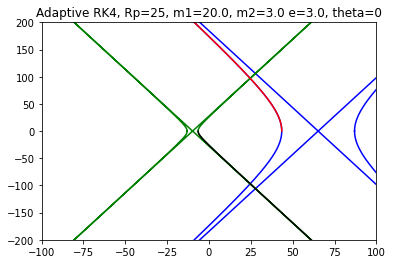

In [108]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-100,100)
#plt.axis('equal')
mtot=masses[0]+masses[1]
semimajor0=rad0*masses[1]/mtot
semimajor1=rad0*masses[0]/mtot
plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(hyperbfns.getxtheory(theta0,ecc0,semimajor1,t,1),hyperbfns.getytheory(theta0,ecc0,semimajor1,t,1),'b')
plt.plot(hyperbfns.getxtheory(theta0,ecc0,semimajor0,t,-1),hyperbfns.getytheory(theta0,ecc0,semimajor0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'k')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

/home/sdorsher/KeplerianOrbits/ellipsefns.py:9: RuntimeWarning: invalid value encountered in sqrt
  b=np.sqrt(a**2-c**2)
/home/sdorsher/KeplerianOrbits/ellipsefns.py:9: RuntimeWarning: invalid value encountered in sqrt
  b=np.sqrt(a**2-c**2)


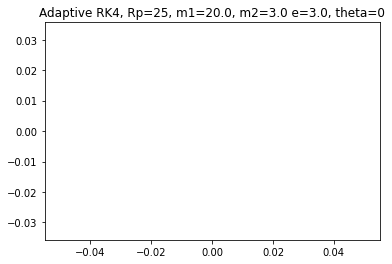

In [110]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-100,100)
plt.xlim(-100,100)
plt.axis('equal')
mtot=masses[0]+masses[1]
semimajor0=rad0*masses[1]/mtot
semimajor1=rad0*masses[0]/mtot
plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(ellipsefns.getxtheory(theta0,ecc0,semimajor0,t,1),ellipsefns.getytheory(theta0,ecc0,semimajor0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,semimajor1,t,-1),ellipsefns.getytheory(theta0,ecc0,semimajor1,t,-1),'g')
#plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
#plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

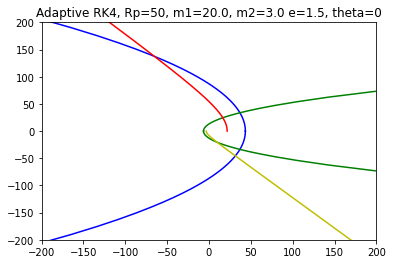

In [20]:
import matplotlib.pyplot as plt
t= np.linspace(0,2*math.pi,100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
semimajor0=rad0*masses[1]/mtot
semimajor1=rad0*masses[0]/mtot
plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
#plt.title("Parabolic Orbit, Adaptive RK4, F="+str(rad0)+", theta="+str(round(180*theta0/math.pi)))
#plt.axis('equal')
xth1=parabfns.getxtheory(theta0,ecc0,semimajor1,t,1)
yth1=parabfns.getytheory(theta0,ecc0,semimajor1,t,1)
xth0=parabfns.getxtheory(theta0,ecc0,semimajor0,t,-1)
yth0=parabfns.getytheory(theta0,ecc0,semimajor0,t,-1)
plt.plot(xth1,yth1,'b')
plt.plot(xth0,yth0,'g')
#plt.plot(xth1,yth1,'o')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

/home/sdorsher/KeplerianOrbits/ellipsefns.py:9: RuntimeWarning: invalid value encountered in sqrt
  b=np.sqrt(a**2-c**2)
/home/sdorsher/KeplerianOrbits/ellipsefns.py:9: RuntimeWarning: invalid value encountered in sqrt
  b=np.sqrt(a**2-c**2)


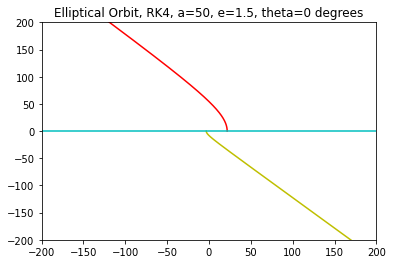

In [21]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2
oneellipse=int(len(npdt))
plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

/home/sdorsher/KeplerianOrbits/ellipsefns.py:9: RuntimeWarning: invalid value encountered in sqrt
  b=np.sqrt(a**2-c**2)
/home/sdorsher/KeplerianOrbits/ellipsefns.py:9: RuntimeWarning: invalid value encountered in sqrt
  b=np.sqrt(a**2-c**2)


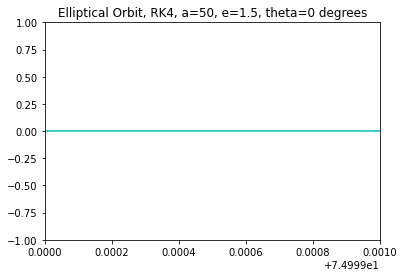

In [22]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'*y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

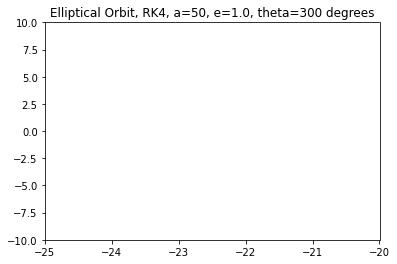

In [134]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [104]:
nperr

array([0.        , 0.00066336, 0.00098923, ..., 0.0032798 , 0.0032798 ,
       0.0032798 ])

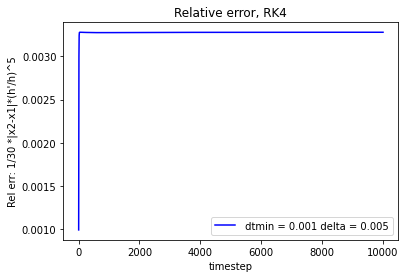

In [105]:


plt.xlabel("timestep")
plt.ylabel("Rel err: 1/30 *|x2-x1|*(h'/h)^5")
plt.title("Relative error, RK4")
relerrplt,=plt.plot(np.arange(2,oneellipse),nperr[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))
plt.legend(handles=[relerrplt])
plt.show()

This curve should be constant and about equal to delta

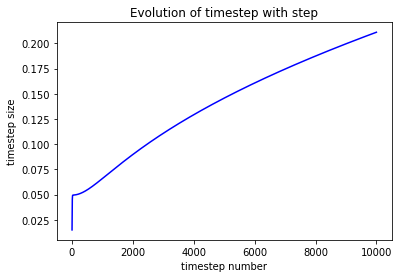

In [106]:


plt.xlabel("timestep number")
plt.ylabel("timestep size")
plt.title("Evolution of timestep with step")
relerrplt,=plt.plot(np.arange(2,oneellipse),npdt[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))

plt.show()

For appropriately set tolerances, adaptive timestep no longer has feedback issues. Tol=delta=0.0005 or less. The important thing is that this curve is smooth and has no constant regions where the value is pinned to either the maximum or minimum. We also seek reasonable starting values for the timestep. 

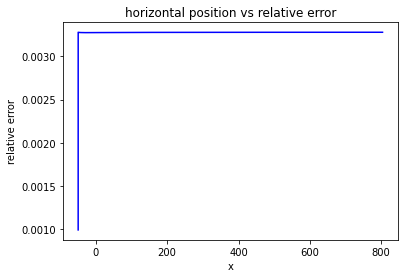

In [107]:
plt.xlabel("x")
plt.ylabel("relative error")
plt.title("horizontal position vs relative error")
plt.plot(npstar1x[2:oneellipse,0], nperr[2:oneellipse],'b')
plt.show()

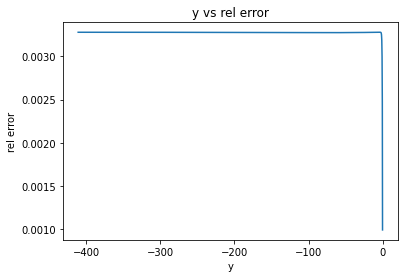

In [108]:
plt.xlabel("y")
plt.ylabel("rel error")
plt.title("y vs rel error")
plt.plot(npstar1x[2:oneellipse,1],nperr[2:oneellipse])
plt.show()

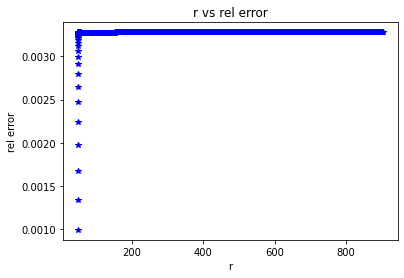

In [109]:
plt.xlabel("r")
plt.ylabel("rel error")
plt.title("r vs rel error")
rstar1x=np.sqrt(npstar1x[:,0]**2+npstar1x[:,1]**2)
plt.plot(rstar1x[2:oneellipse],nperr[2:oneellipse],'*b')
plt.show()

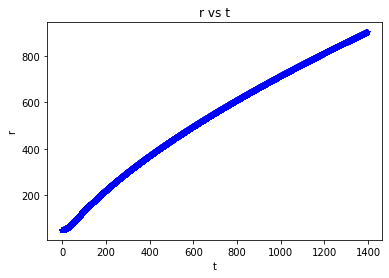

In [110]:
plt.xlabel("t")
plt.ylabel("r")
plt.title("r vs t")
plt.plot(nptimes[2:oneellipse], rstar1x[2:oneellipse], '*b')
plt.show()

In [111]:
thetaellipse = np.arctan2(npstar1x[2:oneellipse,1],npstar1x[2:oneellipse,0])

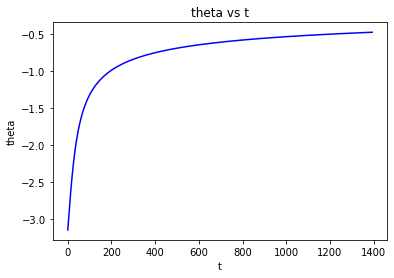

In [112]:
plt.xlabel("t")
plt.ylabel("theta")
plt.title("theta vs t")
plt.plot(nptimes[2:oneellipse],thetaellipse,'b')
plt.show()

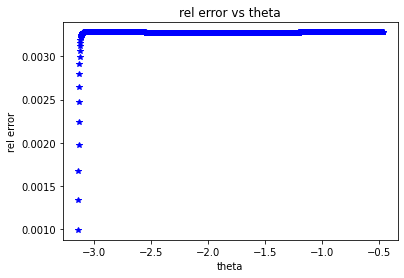

In [113]:
plt.xlabel("theta")
plt.ylabel("rel error")
plt.title("rel error vs theta")
plt.plot(thetaellipse, nperr[2:oneellipse],'*b')
plt.show()


# Conservation of angular momentum

In [ ]:
import Lstability

In [ ]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

In [ ]:
deltaL*Lavg

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [ ]:
import Estability

In [ ]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

In [ ]:
deltaE*Eavg

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [ ]:
import orbitSymmetricTol

In [ ]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [ ]:
allcancelsx

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [ ]:
allcancelsa

In [ ]:
npstar1x

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [ ]:
import aeTest

In [ ]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [ ]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

In [ ]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [ ]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [ ]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [ ]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [ ]:
ellipsecenter

In [ ]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [ ]:
(np.array(coordap)+np.array(coordper))/2

In [ ]:
getEllipsecenter(ecc0,rad0,theta0, True)

In [ ]:
np.arctan2(-1.,0)/math.pi*180

In [ ]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [ ]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

In [ ]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [ ]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [ ]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [ ]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [ ]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [ ]:
endindex

In [ ]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
plt.plot(Eang0, xE0)

In [ ]:
plt.plot(Eang0, yE0)

In [ ]:
plt.plot(xE0,yE0)

In [ ]:
plt.plot(nptimesoneorbit,xE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [ ]:
np.arctan(0./1.)

In [ ]:
yE0[0]

In [ ]:
xE0[0]

In [ ]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [ ]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

In [ ]:
np.max(Eangtest)

In [ ]:
nptimes[0]

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
tpredoneorbit=Eangtest[0:endindex-1]

In [ ]:
Eangoneorbit=Eang0[0:endindex-1]

In [ ]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

In [ ]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

In [ ]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

In [ ]:
outt

Semimajor axis fit is good to about .1 percent at an eccentricity of 0.5. rad=49.886512 for delta=0.0001. rad=49.8863857 for delta = 0.0005. ecc = 0.51764747 for delta = 0.0001. ecc = 0.51765166 for delta = 0.0005. so both ecc and rad improve with a smaller delta, but not quickly. The program runs very slowly for large delta and requires 500000 timesteps for delta=0.0001. 

In [ ]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

In [ ]:
from scipy.fft import fft

In [ ]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [ ]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [ ]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

In [ ]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [ ]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

In [ ]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

In [ ]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

In [ ]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5